# ASA COURSEWORK-1

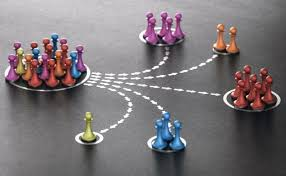 

# Importing the librabries

In [425]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [426]:
import pandas

#-- load in the data
filename1 = "baskets_sample.csv"
filename2 = "category_spends_sample.csv"
filename3 = "customers_sample.csv" #this
filename4 = "lineitems_sample.csv" #this"

baskets_sample = pandas.read_csv(filename1)
category_spends_sample = pandas.read_csv(filename2).set_index('customer_number')
customers_sample = pandas.read_csv(filename3).set_index('customer_number')
lineitems_sample = pandas.read_csv(filename4)



# Exploratory Data Analysis and Data Cleaning

In [427]:
#-- detail the number of datapoints and featuers
print("Number of datapoints %d and number of features %d in the lineitems_sample table" %(lineitems_sample.shape[0], lineitems_sample.shape[1]))
print("Number of datapoints %d and number of features %d in the customers_sample table" %(customers_sample.shape[0], customers_sample.shape[1]))
print("Number of datapoints %d and number of features %d in the baskets_sample table" %(baskets_sample.shape[0], baskets_sample.shape[1]))
print("Number of datapoints %d and number of features %d in the category_spends_sample table" %(category_spends_sample.shape[0], category_spends_sample.shape[1]))


Number of datapoints 1461315 and number of features 6 in the lineitems_sample table
Number of datapoints 3000 and number of features 5 in the customers_sample table
Number of datapoints 195547 and number of features 5 in the baskets_sample table
Number of datapoints 3000 and number of features 20 in the category_spends_sample table


In [428]:
# This file details information about each individual visit made by the 3000 customer’s in the sample.
# Please note we don't have a basket_Id uniquely idntifying each visit. Instead, we can use the customer number in conjunction with purchase time as unique identifiers of each visit.

# Replace £ values in the basket_spend column
baskets_sample[baskets_sample.columns[3]]= baskets_sample[baskets_sample.columns[3]].replace('[\£,]', '', regex=True).astype(float)
baskets_sample.head(3)

customer_number        purchase_time  basket_quantity  basket_spend  \
0            11911  2007-03-01 07:06:00                7          3.09   
1             4047  2007-03-01 07:13:00                9          7.99   
2             3571  2007-03-01 07:27:00                9         37.06   

   basket_categories  
0                  3  
1                  5  
2                  6

In [429]:
# This file again lists the 3000 customers in the sample, but this time it splits down their spend over the period into 20 item categories

print(category_spends_sample.dtypes)
category_spends_sample.head(4)

fruit_veg               object
dairy                   object
confectionary           object
grocery_food            object
grocery_health_pets     object
bakery                  object
newspapers_magazines    object
prepared_meals          object
soft_drinks             object
frozen                  object
meat                    object
tobacco                 object
drinks                  object
deli                    object
world_foods             object
lottery                 object
cashpoint               object
seasonal_gifting        object
discount_bakery         object
practical_items         object
dtype: object


fruit_veg    dairy confectionary grocery_food  \
customer_number                                                 
11387              £64.58   £35.91       £107.78       £27.08   
8171               £16.89   £37.24        £28.84       £33.43   
1060               £87.30   £82.98        £49.88       £20.57   
3728               £84.05  £186.56       £175.50      £119.84   

                grocery_health_pets bakery newspapers_magazines  \
customer_number                                                   
11387                        £29.59  £0.00               £54.83   
8171                         £66.40  £0.00               £22.06   
1060                         £37.04  £0.00                £9.85   
3728                        £111.08  £0.00               £13.05   

                prepared_meals soft_drinks  frozen    meat  tobacco  drinks  \
customer_number                                                               
11387                    £6.35      £22.83  £21.51  £28.62  £162.10  £28.02   
8171                    £12.09       £2.34  £78.74  £26.44    £0.00   £8.42   
1060                    £57.98      £31.12  £14.53  £54.65    £0.00   £0.00   
3728                    £25.54     £124.42  £15.24   £0.95  £127.70   £0.00   

                   deli world_foods lottery cashpoint seasonal_gifting  \
customer_number                                                          
11387            £28.12      £28.54   £2.00    £15.00            £7.48   
8171              £2.65       £3.76   £0.00     £0.00            £9.99   
1060              £2.60       £0.00  £18.00    £20.00          £106.46   
3728              £0.00       £0.00   £4.00     £0.00            £0.00   

                discount_bakery practical_items  
customer_number                                  
11387                     £0.00           £0.84  
8171                      £0.00           £0.00  
1060                      £0.00           £0.00  
3728                      £0.00           £4.50

In [430]:
# Again, we will need to cast the columns to float
category_spends_sample= category_spends_sample.replace('[\£,]', '', regex=True).astype(float)
category_spends_sample.head(3)

fruit_veg  dairy  confectionary  grocery_food  \
customer_number                                                  
11387                64.58  35.91         107.78         27.08   
8171                 16.89  37.24          28.84         33.43   
1060                 87.30  82.98          49.88         20.57   

                 grocery_health_pets  bakery  newspapers_magazines  \
customer_number                                                      
11387                          29.59     0.0                 54.83   
8171                           66.40     0.0                 22.06   
1060                           37.04     0.0                  9.85   

                 prepared_meals  soft_drinks  frozen   meat  tobacco  drinks  \
customer_number                                                                
11387                      6.35        22.83   21.51  28.62    162.1   28.02   
8171                      12.09         2.34   78.74  26.44      0.0    8.42   
1060                      57.98        31.12   14.53  54.65      0.0    0.00   

                  deli  world_foods  lottery  cashpoint  seasonal_gifting  \
customer_number                                                             
11387            28.12        28.54      2.0       15.0              7.48   
8171              2.65         3.76      0.0        0.0              9.99   
1060              2.60         0.00     18.0       20.0            106.46   

                 discount_bakery  practical_items  
customer_number                                    
11387                        0.0             0.84  
8171                         0.0             0.00  
1060                         0.0             0.00

In [431]:
customers_sample.tail()

baskets  total_quantity  average_quantity total_spend  \
customer_number                                                          
3583                 598             705          1.178930     £619.83   
6434                 635             695          1.094488     £877.16   
9778                1147            1466          1.278117   £1,754.97   
8639                 262             275          1.049618     £332.89   
10805                256             289          1.128906     £353.04   

                average_spend  
customer_number                
3583                    £1.04  
6434                    £1.38  
9778                    £1.53  
8639                    £1.27  
10805                   £1.38

# Feature Engineering and Feature Selection

In [432]:
# Create a new dataframe of purchased quantities across product categries
# the unstack() function is the equivalent of a pivot, so we get a column for every unique product category in the table
lineitems_sample_quantity= lineitems_sample.groupby(['customer_number','category'])['quantity'].sum().unstack('category', fill_value=0).add_prefix('QUANTITY_')
lineitems_sample_quantity.reset_index()

lineitems_sample_quantity.head()

category         QUANTITY_BAKERY  QUANTITY_CASHPOINT  QUANTITY_CONFECTIONARY  \
customer_number                                                                
14                            29                   0                      28   
45                            23                   0                     126   
52                             5                   1                      10   
61                            49                   0                      81   
63                            40                   0                      71   

category         QUANTITY_DAIRY  QUANTITY_DELI  QUANTITY_DISCOUNT_BAKERY  \
customer_number                                                            
14                          133              0                         1   
45                          183              1                         0   
52                            9             30                         0   
61                           52             16                         0   
63                           42             17                         0   

category         QUANTITY_DRINKS  QUANTITY_FROZEN  QUANTITY_FRUIT_VEG  \
customer_number                                                         
14                            69               14                  18   
45                             0                5                  27   
52                             0                1                  54   
61                             4                9                  59   
63                             0               11                  21   

category         QUANTITY_GROCERY_FOOD  QUANTITY_GROCERY_HEALTH_PETS  \
customer_number                                                        
14                                  57                            44   
45                                 108                            25   
52                                   1                             9   
61                                  72                            27   
63                                  15                            25   

category         QUANTITY_LOTTERY  QUANTITY_MEAT  \
customer_number                                    
14                              0             69   
45                              0             33   
52                              1              6   
61                              1             64   
63                              3              2   

category         QUANTITY_NEWSPAPERS_MAGAZINES  QUANTITY_PRACTICAL_ITEMS  \
customer_number                                                            
14                                           2                         0   
45                                          41                         0   
52                                           3                         0   
61                                          10                         3   
63                                           3                         0   

category         QUANTITY_PREPARED_MEALS  QUANTITY_SEASONAL_GIFTING  \
customer_number                                                       
14                                    10                          4   
45                                    35                          0   
52                                     2                          7   
61                                     8                          3   
63                                    12                          0   

category         QUANTITY_SOFT_DRINKS  QUANTITY_TOBACCO  QUANTITY_WORLD_FOODS  
customer_number                                                                
14                                 17                 0                    36  
45                                 38                 0                    10  
52                                 18                 0                   137  
61                                 19                 0                    22  
63           

In [433]:
# Inner-join dataframes using Python syntax.
# An inner-join selects all rows from both participating tables as long as there is a matching column between them (index) - in this case 'customer_number' is common in both
# Also note that spend across product categories and quantities across product categories are aggregated at customer level, so both category_spends_sample and lineitems_sample_quantity have 3,000 records

# Join the newly created lineitems_sample_quantity showing purchased quantities across product categories, with the category_spends_sample table (which shows £ spend across product categories)
category_spend_quantity= category_spends_sample.merge(lineitems_sample_quantity, how= 'inner', left_index=True, right_index=True)


In [434]:
# The resulting table now has 3,000 rows (records) and 40 columns (features)
category_spend_quantity.head()

fruit_veg   dairy  confectionary  grocery_food  \
customer_number                                                   
11387                64.58   35.91         107.78         27.08   
8171                 16.89   37.24          28.84         33.43   
1060                 87.30   82.98          49.88         20.57   
3728                 84.05  186.56         175.50        119.84   
14621                35.16  121.31          79.23         29.03   

                 grocery_health_pets  bakery  newspapers_magazines  \
customer_number                                                      
11387                          29.59     0.0                 54.83   
8171                           66.40     0.0                 22.06   
1060                           37.04     0.0                  9.85   
3728                          111.08     0.0                 13.05   
14621                          37.17     0.0                 40.06   

                 prepared_meals  soft_drinks  frozen  ...  \
customer_number                                       ...   
11387                      6.35        22.83   21.51  ...   
8171                      12.09         2.34   78.74  ...   
1060                      57.98        31.12   14.53  ...   
3728                      25.54       124.42   15.24  ...   
14621                      0.00         4.68    3.33  ...   

                 QUANTITY_GROCERY_HEALTH_PETS  QUANTITY_LOTTERY  \
customer_number                                                   
11387                                      12                 2   
8171                                       36                 0   
1060                                       22                 7   
3728                                       74                 4   
14621                                      67                 0   

                 QUANTITY_MEAT  QUANTITY_NEWSPAPERS_MAGAZINES  \
customer_number                                                 
11387                       12                             56   
8171                        12                             49   
1060                        23                              5   
3728                         1                              5   
14621                       12                             93   

                 QUANTITY_PRACTICAL_ITEMS  QUANTITY_PREPARED_MEALS  \
customer_number                                                      
11387                                   1                        5   
8171                                    0                        9   
1060                                    0                       28   
3728                                    2                       24   
14621                                   0                        0   

                 QUANTITY_SEASONAL_GIFTING  QUANTITY_SOFT_DRINKS  \
customer_number                                                    
11387                                    3                    38   
8171                                     1                     3   
1060                                    16                    27   
3728                                     0                    73   
14621                                    2                     8   

                 QUANTITY_TOBACCO  QUANTITY_WORLD_FOODS  
customer_number                                          
11387                          41                    26  
8171                            0                     4  
1060                            0                     0  
3728                           26                     0  
14621                           0                     0  

[5 rows x 40 columns]

In [435]:
# Further merge the resulting category_spend_quantity table with information on baskets,	total_quantity,	average_quantity,	total_spend,	average_spend for each customer from the customer_sample table
# Again, note that both tables (category_spend_quantity and customer_sample) can be joined on a common column (customer_number)
category_spend_quantity_customers= category_spend_quantity.merge(customers_sample, how= 'inner', left_index=True, right_index=True)




In [436]:
# The resulting tables now has 3,000 rows (records) and 45 columns (features)
print("Number of datapoints: %d and number of features: %d in the category_spend_quantity_customers table" %(category_spend_quantity_customers.shape[0], category_spend_quantity_customers.shape[1]))

Number of datapoints: 3000 and number of features: 45 in the category_spend_quantity_customers table


In [437]:
# Finally, can we join the baskets_sample table with the category_spend_quantity_customers?
# Yes, but you will not get the desired outcome. You'll have noticed that the baskets_sample table has 195,547 records (rows), while the category_spend_quantity_customers has 3,000 records.
# While it is possible to join the two tables based on the customer_number, the resulting table would duplicate rows from the category_spend_quantity_customers in order to match every one of the 195,547 rows in the baskets_sample table
# So we need to start by aggregating the 3 numeric columns in the baskets_sample table at customer level (like we did with lineitems_sample)

baskets_sample_sum= baskets_sample.groupby('customer_number')['basket_quantity','basket_spend',	'basket_categories'].sum().add_prefix('SUM_')
print("Number of datapoints %d and number of features %d in the baskets_sample_sum table" %(baskets_sample_sum.shape[0], baskets_sample_sum.shape[1]))
baskets_sample_sum.head()



Number of datapoints 3000 and number of features 3 in the baskets_sample_sum table


<ipython-input-437-c5565d77a172>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  baskets_sample_sum= baskets_sample.groupby('customer_number')['basket_quantity','basket_spend',	'basket_categories'].sum().add_prefix('SUM_')


SUM_basket_quantity  SUM_basket_spend  SUM_basket_categories
customer_number                                                              
14                               531            675.72                    250
45                               655            585.73                    211
52                               294            222.18                    174
61                               499            547.87                    223
63                               281            293.34                    176

In [438]:
# Now we can join the category_spend_quantity
customers_baskets_categories_lines= baskets_sample_sum.merge(category_spend_quantity_customers, how= 'inner', left_index=True, right_index=True)
print("Number of datapoints %d and number of features %d in the customers_baskets_categories_lines table" %(customers_baskets_categories_lines.shape[0], customers_baskets_categories_lines.shape[1]))
customers_baskets_categories_lines.head(3)

Number of datapoints 3000 and number of features 48 in the customers_baskets_categories_lines table


SUM_basket_quantity  SUM_basket_spend  SUM_basket_categories  \
customer_number                                                                 
14                               531            675.72                    250   
45                               655            585.73                    211   
52                               294            222.18                    174   

                 fruit_veg   dairy  confectionary  grocery_food  \
customer_number                                                   
14                   11.10  172.58          23.22         56.05   
45                   30.21  142.16         106.54         83.42   
52                   53.29    5.19           3.29          1.08   

                 grocery_health_pets  bakery  newspapers_magazines  ...  \
customer_number                                                     ...   
14                             11.28     0.0                  6.40  ...   
45                             24.31     0.0                 17.49  ...   
52                             12.11     0.0                  3.12  ...   

                 QUANTITY_PREPARED_MEALS  QUANTITY_SEASONAL_GIFTING  \
customer_number                                                       
14                                    10                          4   
45                                    35                          0   
52                                     2                          7   

                 QUANTITY_SOFT_DRINKS  QUANTITY_TOBACCO  QUANTITY_WORLD_FOODS  \
customer_number                                                                 
14                                 17                 0                    36   
45                                 38                 0                    10   
52                                 18                 0                   137   

                 baskets  total_quantity  average_quantity  total_spend  \
customer_number                                                           
14                   381             531          1.393701      £675.72   
45                   561             655          1.167558      £585.73   
52                   206             294          1.427184      £222.18   

                 average_spend  
customer_number                 
14                       £1.77  
45                       £1.04  
52                       £1.08  

[3 rows x 48 columns]

In [439]:
# Let's list all the columns in the big table we just generated:
list(customers_baskets_categories_lines.columns.values)

['SUM_basket_quantity',
 'SUM_basket_spend',
 'SUM_basket_categories',
 'fruit_veg',
 'dairy',
 'confectionary',
 'grocery_food',
 'grocery_health_pets',
 'bakery',
 'newspapers_magazines',
 'prepared_meals',
 'soft_drinks',
 'frozen',
 'meat',
 'tobacco',
 'drinks',
 'deli',
 'world_foods',
 'lottery',
 'cashpoint',
 'seasonal_gifting',
 'discount_bakery',
 'practical_items',
 'QUANTITY_BAKERY',
 'QUANTITY_CASHPOINT',
 'QUANTITY_CONFECTIONARY',
 'QUANTITY_DAIRY',
 'QUANTITY_DELI',
 'QUANTITY_DISCOUNT_BAKERY',
 'QUANTITY_DRINKS',
 'QUANTITY_FROZEN',
 'QUANTITY_FRUIT_VEG',
 'QUANTITY_GROCERY_FOOD',
 'QUANTITY_GROCERY_HEALTH_PETS',
 'QUANTITY_LOTTERY',
 'QUANTITY_MEAT',
 'QUANTITY_NEWSPAPERS_MAGAZINES',
 'QUANTITY_PRACTICAL_ITEMS',
 'QUANTITY_PREPARED_MEALS',
 'QUANTITY_SEASONAL_GIFTING',
 'QUANTITY_SOFT_DRINKS',
 'QUANTITY_TOBACCO',
 'QUANTITY_WORLD_FOODS',
 'baskets',
 'total_quantity',
 'average_quantity',
 'total_spend',
 'average_spend']

In [440]:
#checking the data type of each feature for the newly created dataset
customers_baskets_categories_lines.dtypes

SUM_basket_quantity                int64
SUM_basket_spend                 float64
SUM_basket_categories              int64
fruit_veg                        float64
dairy                            float64
confectionary                    float64
grocery_food                     float64
grocery_health_pets              float64
bakery                           float64
newspapers_magazines             float64
prepared_meals                   float64
soft_drinks                      float64
frozen                           float64
meat                             float64
tobacco                          float64
drinks                           float64
deli                             float64
world_foods                      float64
lottery                          float64
cashpoint                        float64
seasonal_gifting                 float64
discount_bakery                  float64
practical_items                  float64
QUANTITY_BAKERY                    int64
QUANTITY_CASHPOI

In [441]:
# Remove the currency symbol '£' and commas, then convert to float
customers_baskets_categories_lines['average_spend'] = customers_baskets_categories_lines['average_spend'].str.replace('£', '').str.replace(',', '').astype(float)
customers_baskets_categories_lines['total_spend'] = customers_baskets_categories_lines['total_spend'].str.replace('£', '').str.replace(',', '').astype(float)


In [442]:
# Display the newly created dataset by merging all the loaded tables
print(customers_baskets_categories_lines.head())

                 SUM_basket_quantity  SUM_basket_spend  SUM_basket_categories  \
customer_number                                                                 
14                               531            675.72                    250   
45                               655            585.73                    211   
52                               294            222.18                    174   
61                               499            547.87                    223   
63                               281            293.34                    176   

                 fruit_veg   dairy  confectionary  grocery_food  \
customer_number                                                   
14                   11.10  172.58          23.22         56.05   
45                   30.21  142.16         106.54         83.42   
52                   53.29    5.19           3.29          1.08   
61                   70.18   55.29          46.39         56.18   
63                   22.01   4

In [443]:
customers_baskets_categories_lines.describe

<bound method NDFrame.describe of                  SUM_basket_quantity  SUM_basket_spend  SUM_basket_categories  \
customer_number                                                                 
14                               531            675.72                    250   
45                               655            585.73                    211   
52                               294            222.18                    174   
61                               499            547.87                    223   
63                               281            293.34                    176   
...                              ...               ...                    ...   
16295                            322            679.70                    200   
16301                            268            251.43                    115   
16303                            331            354.32                    217   
16306                            300            462.81                    1

# Visualize the newly created dataset

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns

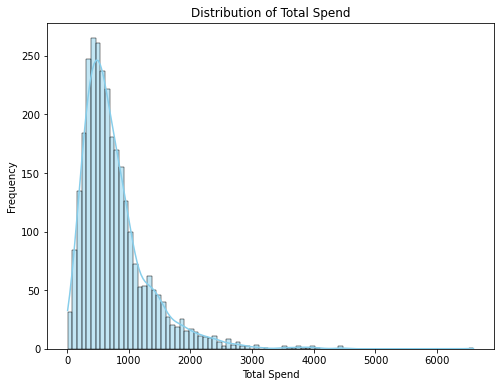

In [445]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Plot distribution of total spend
sns.histplot(customers_baskets_categories_lines['total_spend'], kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.title('Distribution of Total Spend')

# Show plot
plt.show()


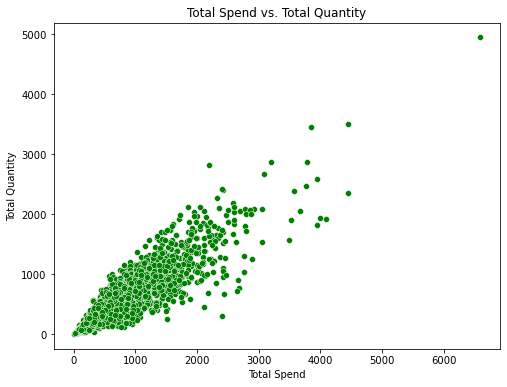

In [446]:
# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Plot total spend vs. total quantity
sns.scatterplot(data=customers_baskets_categories_lines, x='total_spend', y='total_quantity', color='green')

# Add labels and title
plt.xlabel('Total Spend')
plt.ylabel('Total Quantity')
plt.title('Total Spend vs. Total Quantity')

# Show plot
plt.show()


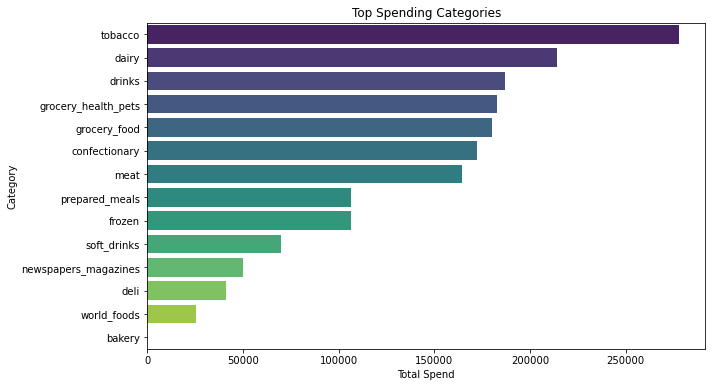

In [447]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Calculate total spend for each category
category_spend = customers_baskets_categories_lines.iloc[:, 4:18].sum()

# Sort categories by total spend
category_spend_sorted = category_spend.sort_values(ascending=False)

# Plot top spending categories
sns.barplot(x=category_spend_sorted.values, y=category_spend_sorted.index, palette='viridis')

# Add labels and title
plt.xlabel('Total Spend')
plt.ylabel('Category')
plt.title('Top Spending Categories')

# Show plot
plt.show()


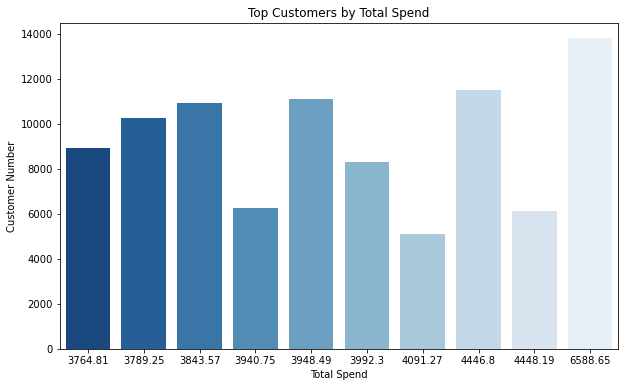

In [448]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Sort customers by total spend in descending order
top_customers = customers_baskets_categories_lines.sort_values(by='total_spend', ascending=False).head(10)

# Reverse the order of the DataFrame
top_customers = top_customers.iloc[::-1]

# Plot top customers based on total spend
sns.barplot(x='total_spend', y=top_customers.index, data=top_customers, palette='Blues_r')

# Add labels and title
plt.xlabel('Total Spend')
plt.ylabel('Customer Number')
plt.title('Top Customers by Total Spend')

# Show plot
plt.show()


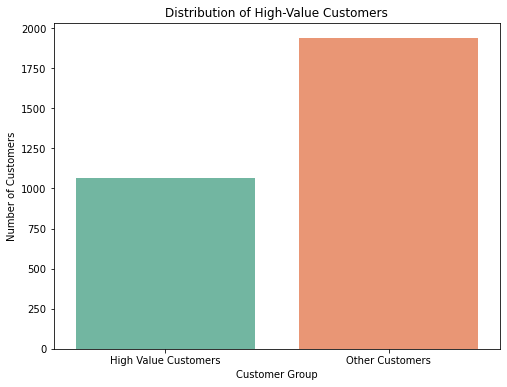

In [449]:
# Set a threshold for high-value customers
threshold = 800  # Adjust as needed

# Select high-value customers based on the threshold
high_value_customers = customers_baskets_categories_lines[customers_baskets_categories_lines['total_spend'] > threshold]

# Count the number of high-value customers per category
high_value_customers_count = high_value_customers.shape[0]

# Calculate the total number of customers
total_customers = customers_baskets_categories_lines.shape[0]

# Plot bar plot showing the distribution of high-value customers
plt.figure(figsize=(8, 6))
sns.barplot(x=['High Value Customers', 'Other Customers'], y=[high_value_customers_count, total_customers - high_value_customers_count], palette='Set2')

# Add labels and title
plt.xlabel('Customer Group')
plt.ylabel('Number of Customers')
plt.title('Distribution of High-Value Customers')

# Show plot
plt.show()


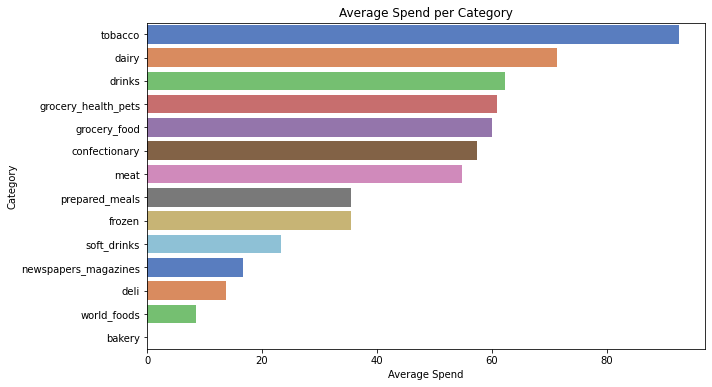

In [450]:
avg_spend_per_category = customers_baskets_categories_lines.iloc[:, 4:18].mean()
avg_spend_per_category_sorted = avg_spend_per_category.sort_values(ascending=False)  # Sort the values in descending order

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_spend_per_category_sorted.values, y=avg_spend_per_category_sorted.index, palette='muted')  # Change the color palette
plt.xlabel('Average Spend')
plt.ylabel('Category')
plt.title('Average Spend per Category')
plt.show()


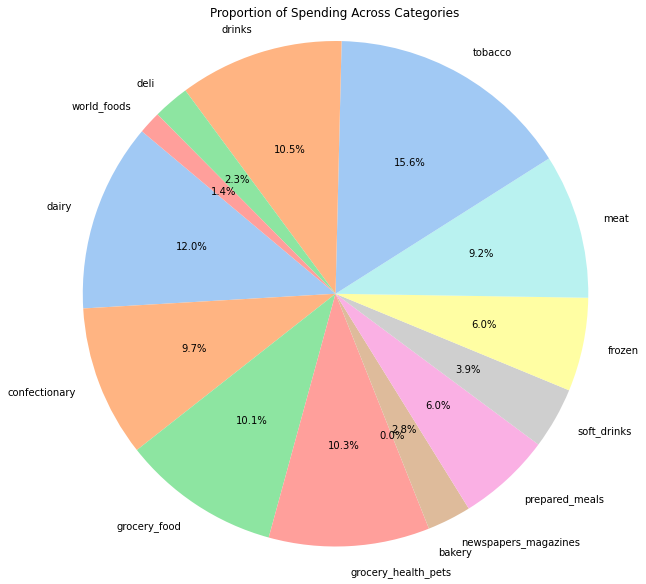

In [451]:
category_spend = customers_baskets_categories_lines.iloc[:, 4:18].sum()
plt.figure(figsize=(10, 10))
plt.pie(category_spend, labels=category_spend.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Proportion of Spending Across Categories')
plt.axis('equal')
plt.show()


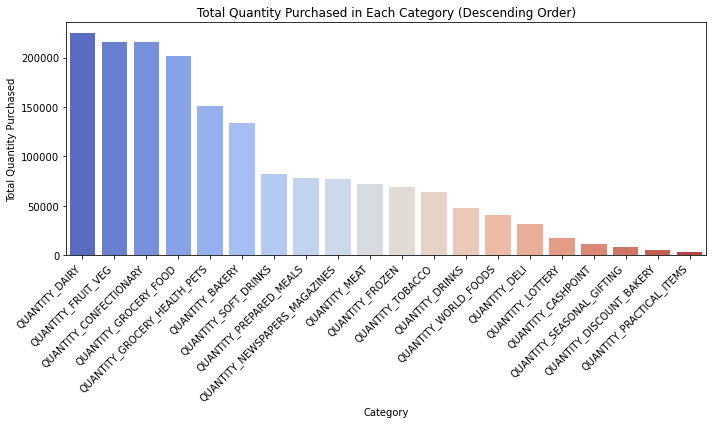

In [452]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total quantity purchased in each category
total_quantity = customers_baskets_categories_lines[['QUANTITY_BAKERY', 'QUANTITY_CASHPOINT', 'QUANTITY_CONFECTIONARY', 'QUANTITY_DAIRY',
                     'QUANTITY_DELI', 'QUANTITY_DISCOUNT_BAKERY', 'QUANTITY_DRINKS', 'QUANTITY_FROZEN',
                     'QUANTITY_FRUIT_VEG', 'QUANTITY_GROCERY_FOOD', 'QUANTITY_GROCERY_HEALTH_PETS',
                     'QUANTITY_LOTTERY', 'QUANTITY_MEAT', 'QUANTITY_NEWSPAPERS_MAGAZINES', 'QUANTITY_PRACTICAL_ITEMS',
                     'QUANTITY_PREPARED_MEALS', 'QUANTITY_SEASONAL_GIFTING', 'QUANTITY_SOFT_DRINKS',
                     'QUANTITY_TOBACCO', 'QUANTITY_WORLD_FOODS']].sum()

# Sort the total quantity in descending order
total_quantity_sorted = total_quantity.sort_values(ascending=False)

# Define custom color palette
custom_palette = sns.color_palette("coolwarm", len(total_quantity_sorted))

# Bar Plot of Total Quantity Purchased in Each Category
plt.figure(figsize=(10, 6))
sns.barplot(x=total_quantity_sorted.index, y=total_quantity_sorted.values, palette=custom_palette)
plt.title('Total Quantity Purchased in Each Category (Descending Order)')
plt.xlabel('Category')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


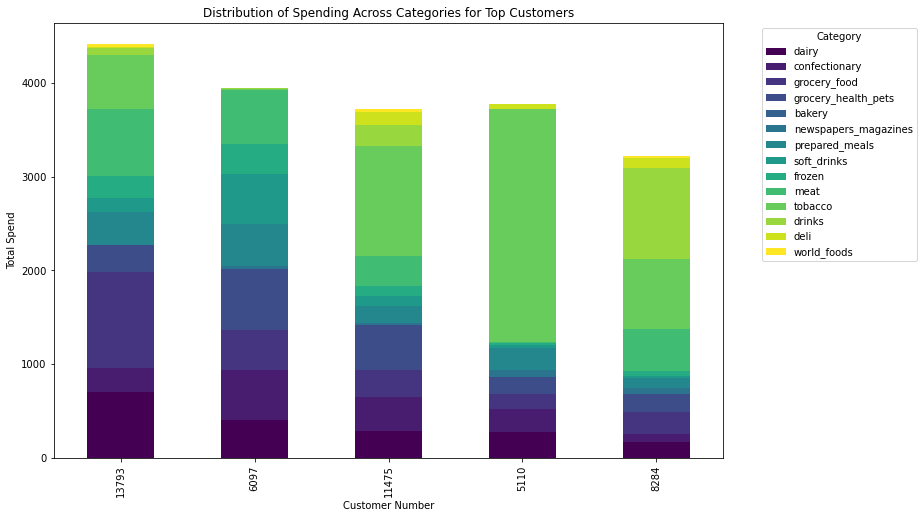

In [453]:
# Select top customers based on total spend
top_customers = customers_baskets_categories_lines.sort_values(by='total_spend', ascending=False).head(5)

# Plot stacked bar plot for top customers
top_customers.iloc[:, 4:18].plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')
plt.xlabel('Customer Number')
plt.ylabel('Total Spend')
plt.title('Distribution of Spending Across Categories for Top Customers')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


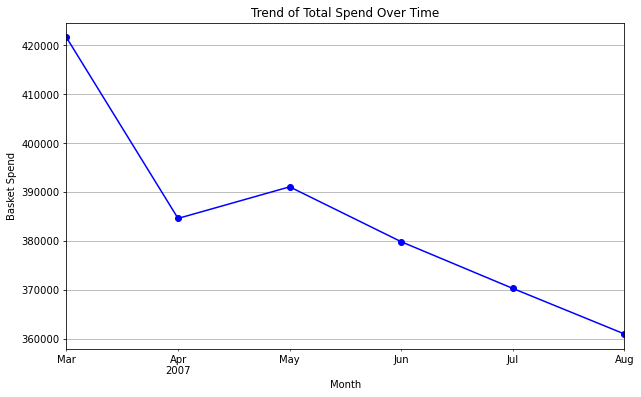

In [454]:
# plotting a 'purchase_time' column in the dataset of baskets
baskets_sample['purchase_time'] = pd.to_datetime(baskets_sample['purchase_time'])

# Aggregate total spend by month
total_spend_monthly = baskets_sample.resample('M', on='purchase_time')['basket_spend'].sum()

plt.figure(figsize=(10, 6))
total_spend_monthly.plot(color='blue', marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Basket Spend')
plt.title('Trend of Total Spend Over Time')
plt.grid(True)
plt.show()


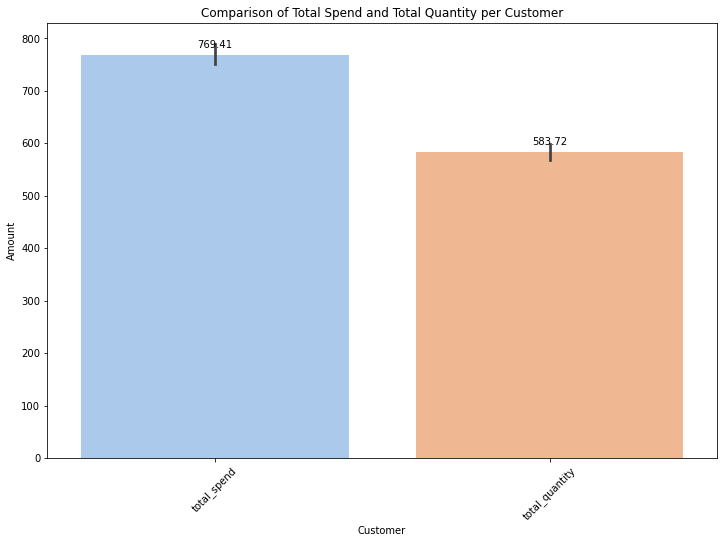

In [455]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=customers_baskets_categories_lines[['total_spend', 'total_quantity']], palette='pastel')

# Annotate each bar with its respective value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.xlabel('Customer')
plt.ylabel('Amount')
plt.title('Comparison of Total Spend and Total Quantity per Customer')
plt.xticks(rotation=45)
plt.show()


# Features

Selecting relevant features: the dataset contains a large number of features, consider selecting only the most relevant ones to reduce dimensionality and computational complexity.
Creating new features: Generating new features that might be more informative or relevant for clustering.


In [456]:
lineitems_sample.head(2)

customer_number        purchase_time  product_id             category  \
0            14577  2007-03-10 11:58:00      722653         GROCERY_FOOD   
1             7210  2007-03-22 10:53:00      696136  GROCERY_HEALTH_PETS   

   quantity  spend  
0         1  £1.39  
1         1  £4.25

In [457]:
# Remove the currency symbol '£' and commas, then convert to float
lineitems_sample['spend'] = lineitems_sample['spend'].str.replace('£', '').str.replace(',', '').astype(float)


In [458]:
df_lineitems_agg = lineitems_sample.groupby('customer_number').agg({'spend': 'sum', 'purchase_time': 'nunique'}).reset_index()
df_lineitems_agg.columns = ['customer_number', 'total_spend', 'num_purchases']

In [459]:
# Create a new dataframe of purchased quantities across product categories
lineitems_sample_quantity= lineitems_sample.groupby(['customer_number','category'])['quantity'].sum().unstack('category', fill_value=0).add_prefix('QUANTITY_')
lineitems_sample_quantity.reset_index()

lineitems_sample_quantity.shape

(3000, 20)

In [460]:
import pandas as pd

# Define the updated category names for quantities
healthy_food_categories_quantity = ['QUANTITY_FRUIT_VEG', 'QUANTITY_DAIRY', 'QUANTITY_GROCERY_FOOD', 'QUANTITY_GROCERY_HEALTH_PETS','QUANTITY_MEAT']
indulgent_food_categories_quantity = ['QUANTITY_BAKERY', 'QUANTITY_CONFECTIONARY','QUANTITY_DISCOUNT_BAKERY', 'QUANTITY_DRINKS', 'QUANTITY_FROZEN', 'QUANTITY_DELI', 'QUANTITY_PREPARED_MEALS', 'QUANTITY_SOFT_DRINKS', 'QUANTITY_WORLD_FOODS']
miscellaneous_categories_quantity = ['QUANTITY_CASHPOINT', 'QUANTITY_LOTTERY', 'QUANTITY_TOBACCO', 'QUANTITY_NEWSPAPERS_MAGAZINES', 'QUANTITY_PRACTICAL_ITEMS', 'QUANTITY_SEASONAL_GIFTING']

# Aggregate food category wise distributed quantities with updated category names
healthy_food_category_quantities = lineitems_sample_quantity[healthy_food_categories_quantity].sum(axis=1)
indulgent_food_category_quantities = lineitems_sample_quantity[indulgent_food_categories_quantity].sum(axis=1)
miscellaneous_category_quantities = lineitems_sample_quantity[miscellaneous_categories_quantity].sum(axis=1)

# Create DataFrame with updated aggregated category wise distributed quantities
aggregated_category_quantities = pd.DataFrame({
    'healthy_food_category_quantities': healthy_food_category_quantities,
    'indulgent_food_category_quantities': indulgent_food_category_quantities,
    'miscellaneous_category_quantities': miscellaneous_category_quantities
})

# Display the head of the updated aggregated DataFrame
aggregated_category_quantities.head()


healthy_food_category_quantities  \
customer_number                                     
14                                            321   
45                                            376   
52                                             79   
61                                            274   
63                                            105   

                 indulgent_food_category_quantities  \
customer_number                                       
14                                              204   
45                                              238   
52                                              203   
61                                              208   
63                                              170   

                 miscellaneous_category_quantities  
customer_number                                     
14                                               6  
45                                              41  
52                                              12  
61                                              17  
63                                               6

In [461]:
merged_df = df_lineitems_agg.merge(aggregated_category_quantities, on='customer_number')
merged_df.head()

customer_number  total_spend  num_purchases  \
0               14       675.72             56   
1               45       585.73             33   
2               52       222.18             59   
3               61       547.87             37   
4               63       293.34             48   

   healthy_food_category_quantities  indulgent_food_category_quantities  \
0                               321                                 204   
1                               376                                 238   
2                                79                                 203   
3                               274                                 208   
4                               105                                 170   

   miscellaneous_category_quantities  
0                                  6  
1                                 41  
2                                 12  
3                                 17  
4                                  6

In [462]:
category_spends_sample.head(2)

fruit_veg  dairy  confectionary  grocery_food  \
customer_number                                                  
11387                64.58  35.91         107.78         27.08   
8171                 16.89  37.24          28.84         33.43   

                 grocery_health_pets  bakery  newspapers_magazines  \
customer_number                                                      
11387                          29.59     0.0                 54.83   
8171                           66.40     0.0                 22.06   

                 prepared_meals  soft_drinks  frozen   meat  tobacco  drinks  \
customer_number                                                                
11387                      6.35        22.83   21.51  28.62    162.1   28.02   
8171                      12.09         2.34   78.74  26.44      0.0    8.42   

                  deli  world_foods  lottery  cashpoint  seasonal_gifting  \
customer_number                                                             
11387            28.12        28.54      2.0       15.0              7.48   
8171              2.65         3.76      0.0        0.0              9.99   

                 discount_bakery  practical_items  
customer_number                                    
11387                        0.0             0.84  
8171                         0.0             0.00

In [463]:
import pandas as pd

# Define the updated category names
healthy_food_categories = ['fruit_veg', 'dairy', 'grocery_food', 'grocery_health_pets','meat']
indulgent_food_categories = ['bakery','confectionary', 'discount_bakery', 'prepared_meals', 'drinks', 'soft_drinks', 'frozen', 'deli', 'world_foods']
miscellaneous_categories = [ 'newspapers_magazines', 'tobacco', 'lottery', 'cashpoint', 'seasonal_gifting', 'practical_items']

# Aggregate food category spends with updated category names
healthy_food_category_spends = category_spends_sample[healthy_food_categories].sum(axis=1)
indulgent_food_category_spends = category_spends_sample[indulgent_food_categories].sum(axis=1)
miscellaneous_category_spends = category_spends_sample[miscellaneous_categories].sum(axis=1)

# Create a DataFrame with updated category names
aggregated_category_spends = pd.DataFrame({
    'healthy_food_category_spends': healthy_food_category_spends,
    'indulgent_food_category_spends': indulgent_food_category_spends,
    'miscellaneous_category_spends': miscellaneous_category_spends
})

# Display the updated aggregated category spends DataFrame
aggregated_category_spends.head()


healthy_food_category_spends  indulgent_food_category_spends  \
customer_number                                                                 
11387                                  185.78                          243.15   
8171                                   180.40                          136.84   
1060                                   282.54                          156.11   
3728                                   502.48                          340.70   
14621                                  258.91                          188.95   

                 miscellaneous_category_spends  
customer_number                                 
11387                                   242.25  
8171                                     32.05  
1060                                    154.31  
3728                                    149.25  
14621                                    43.46

In [464]:
#Merging the aggregated category columns with the merged dataset
merged_df = merged_df.merge(aggregated_category_spends, on='customer_number')
merged_df.set_index('customer_number', inplace=True)
merged_df.head()

total_spend  num_purchases  healthy_food_category_quantities  \
customer_number                                                                 
14                    675.72             56                               321   
45                    585.73             33                               376   
52                    222.18             59                                79   
61                    547.87             37                               274   
63                    293.34             48                               105   

                 indulgent_food_category_quantities  \
customer_number                                       
14                                              204   
45                                              238   
52                                              203   
61                                              208   
63                                              170   

                 miscellaneous_category_quantities  \
customer_number                                      
14                                               6   
45                                              41   
52                                              12   
61                                              17   
63                                               6   

                 healthy_food_category_spends  indulgent_food_category_spends  \
customer_number                                                                 
14                                     433.38                          212.78   
45                                     340.41                          209.83   
52                                      81.41                          101.00   
61                                     348.74                          148.92   
63                                     106.20                          148.79   

                 miscellaneous_category_spends  
customer_number                                 
14                                       11.47  
45                                       17.49  
52                                       37.32  
61                                       17.46  
63                                        5.00

In [465]:
#merging the dataset
merged_df = merged_df.merge(customers_sample, on='customer_number')
merged_df.head()

total_spend_x  num_purchases  \
customer_number                                 
14                      675.72             56   
45                      585.73             33   
52                      222.18             59   
61                      547.87             37   
63                      293.34             48   

                 healthy_food_category_quantities  \
customer_number                                     
14                                            321   
45                                            376   
52                                             79   
61                                            274   
63                                            105   

                 indulgent_food_category_quantities  \
customer_number                                       
14                                              204   
45                                              238   
52                                              203   
61                                              208   
63                                              170   

                 miscellaneous_category_quantities  \
customer_number                                      
14                                               6   
45                                              41   
52                                              12   
61                                              17   
63                                               6   

                 healthy_food_category_spends  indulgent_food_category_spends  \
customer_number                                                                 
14                                     433.38                          212.78   
45                                     340.41                          209.83   
52                                      81.41                          101.00   
61                                     348.74                          148.92   
63                                     106.20                          148.79   

                 miscellaneous_category_spends  baskets  total_quantity  \
customer_number                                                           
14                                       11.47      381             531   
45                                       17.49      561             655   
52                                       37.32      206             294   
61                                       17.46      420             499   
63                                        5.00      268             281   

                 average_quantity total_spend_y average_spend  
customer_number                                                
14                       1.393701       £675.72         £1.77  
45                       1.167558       £585.73         £1.04  
52                       1.427184       £222.18         £1.08  
61                       1.188095       £547.87         £1.30  
63                       1.048507       £293.34         £1.09

In [466]:
merged_df.drop(columns = ['total_spend_y','num_purchases'], inplace = True)
merged_df.head(2)

total_spend_x  healthy_food_category_quantities  \
customer_number                                                    
14                      675.72                               321   
45                      585.73                               376   

                 indulgent_food_category_quantities  \
customer_number                                       
14                                              204   
45                                              238   

                 miscellaneous_category_quantities  \
customer_number                                      
14                                               6   
45                                              41   

                 healthy_food_category_spends  indulgent_food_category_spends  \
customer_number                                                                 
14                                     433.38                          212.78   
45                                     340.41                          209.83   

                 miscellaneous_category_spends  baskets  total_quantity  \
customer_number                                                           
14                                       11.47      381             531   
45                                       17.49      561             655   

                 average_quantity average_spend  
customer_number                                  
14                       1.393701         £1.77  
45                       1.167558         £1.04

In [467]:
# Remove the currency symbol '£' and commas, then convert to float
merged_df['average_spend'] = merged_df['average_spend'].str.replace('£', '').str.replace(',', '').astype(float)


In [468]:
merged_df.rename(columns={'total_spend_x':'total_spend'}, inplace = True)
merged_df.head()

total_spend  healthy_food_category_quantities  \
customer_number                                                  
14                    675.72                               321   
45                    585.73                               376   
52                    222.18                                79   
61                    547.87                               274   
63                    293.34                               105   

                 indulgent_food_category_quantities  \
customer_number                                       
14                                              204   
45                                              238   
52                                              203   
61                                              208   
63                                              170   

                 miscellaneous_category_quantities  \
customer_number                                      
14                                               6   
45                                              41   
52                                              12   
61                                              17   
63                                               6   

                 healthy_food_category_spends  indulgent_food_category_spends  \
customer_number                                                                 
14                                     433.38                          212.78   
45                                     340.41                          209.83   
52                                      81.41                          101.00   
61                                     348.74                          148.92   
63                                     106.20                          148.79   

                 miscellaneous_category_spends  baskets  total_quantity  \
customer_number                                                           
14                                       11.47      381             531   
45                                       17.49      561             655   
52                                       37.32      206             294   
61                                       17.46      420             499   
63                                        5.00      268             281   

                 average_quantity  average_spend  
customer_number                                   
14                       1.393701           1.77  
45                       1.167558           1.04  
52                       1.427184           1.08  
61                       1.188095           1.30  
63                       1.048507           1.09

In [469]:
merged_df.shape

(3000, 11)

In [470]:
baskets_sample_sum = baskets_sample.groupby('customer_number')[['basket_quantity', 'basket_spend', 'basket_categories']].sum().add_prefix('SUM_')
baskets_sample_sum.head()

SUM_basket_quantity  SUM_basket_spend  SUM_basket_categories
customer_number                                                              
14                               531            675.72                    250
45                               655            585.73                    211
52                               294            222.18                    174
61                               499            547.87                    223
63                               281            293.34                    176

In [471]:
baskets_sample_sum.drop(columns = ['SUM_basket_quantity','SUM_basket_spend'], inplace = True)
baskets_sample_sum.head(2)

SUM_basket_categories
customer_number                       
14                                 250
45                                 211

In [472]:
merged_df = merged_df.merge(baskets_sample_sum, on='customer_number')
merged_df.head(2)

total_spend  healthy_food_category_quantities  \
customer_number                                                  
14                    675.72                               321   
45                    585.73                               376   

                 indulgent_food_category_quantities  \
customer_number                                       
14                                              204   
45                                              238   

                 miscellaneous_category_quantities  \
customer_number                                      
14                                               6   
45                                              41   

                 healthy_food_category_spends  indulgent_food_category_spends  \
customer_number                                                                 
14                                     433.38                          212.78   
45                                     340.41                          209.83   

                 miscellaneous_category_spends  baskets  total_quantity  \
customer_number                                                           
14                                       11.47      381             531   
45                                       17.49      561             655   

                 average_quantity  average_spend  SUM_basket_categories  
customer_number                                                          
14                       1.393701           1.77                    250  
45                       1.167558           1.04                    211

In [473]:
merged_df.shape

(3000, 12)

In [474]:
merged_df.isna().sum()

total_spend                           0
healthy_food_category_quantities      0
indulgent_food_category_quantities    0
miscellaneous_category_quantities     0
healthy_food_category_spends          0
indulgent_food_category_spends        0
miscellaneous_category_spends         0
baskets                               0
total_quantity                        0
average_quantity                      0
average_spend                         0
SUM_basket_categories                 0
dtype: int64

In [475]:
merged_df.dtypes

total_spend                           float64
healthy_food_category_quantities        int64
indulgent_food_category_quantities      int64
miscellaneous_category_quantities       int64
healthy_food_category_spends          float64
indulgent_food_category_spends        float64
miscellaneous_category_spends         float64
baskets                                 int64
total_quantity                          int64
average_quantity                      float64
average_spend                         float64
SUM_basket_categories                   int64
dtype: object

In [476]:
merged_df.describe

<bound method NDFrame.describe of                  total_spend  healthy_food_category_quantities  \
customer_number                                                  
14                    675.72                               321   
45                    585.73                               376   
52                    222.18                                79   
61                    547.87                               274   
63                    293.34                               105   
...                      ...                               ...   
16295                 679.70                                53   
16301                 251.43                                61   
16303                 354.32                               190   
16306                 462.81                               182   
16316                 330.40                                85   

                 indulgent_food_category_quantities  \
customer_number                                     

# Plotting the Distribution of Variables Selected

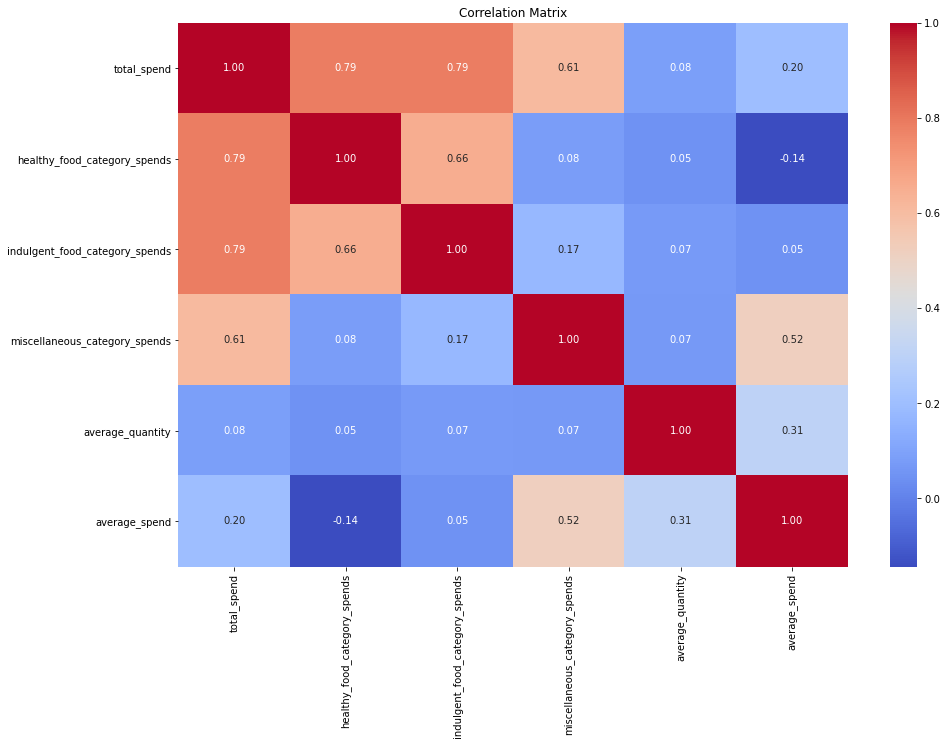

In [477]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame
# Select only numeric columns
numeric_df = merged_df.select_dtypes(include=['int', 'float'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


To eliminate correlation as shown above for total spend with healthy food and indulgent food category we will combine the features of spend and quantity to check if the correlation exists or is eliminated

In [478]:
customers_features_merged = merged_df

In [479]:
#for eliminating correlation or reducing the correlation between the above features the new features are being created:
customers_features_merged['avg_spend_healthy_food_per_unit_qty'] = customers_features_merged['healthy_food_category_spends'] / customers_features_merged['healthy_food_category_quantities']
customers_features_merged['avg_spend_indulgent_food_per_unit_qty'] = customers_features_merged['indulgent_food_category_spends'] / customers_features_merged['indulgent_food_category_quantities']
customers_features_merged['avg_spend_miscelleanous_per_unit_qty'] = customers_features_merged['miscellaneous_category_spends'] / customers_features_merged['miscellaneous_category_quantities']

customers_features_merged.head(2)

total_spend  healthy_food_category_quantities  \
customer_number                                                  
14                    675.72                               321   
45                    585.73                               376   

                 indulgent_food_category_quantities  \
customer_number                                       
14                                              204   
45                                              238   

                 miscellaneous_category_quantities  \
customer_number                                      
14                                               6   
45                                              41   

                 healthy_food_category_spends  indulgent_food_category_spends  \
customer_number                                                                 
14                                     433.38                          212.78   
45                                     340.41                          209.83   

                 miscellaneous_category_spends  baskets  total_quantity  \
customer_number                                                           
14                                       11.47      381             531   
45                                       17.49      561             655   

                 average_quantity  average_spend  SUM_basket_categories  \
customer_number                                                           
14                       1.393701           1.77                    250   
45                       1.167558           1.04                    211   

                 avg_spend_healthy_food_per_unit_qty  \
customer_number                                        
14                                          1.350093   
45                                          0.905346   

                 avg_spend_indulgent_food_per_unit_qty  \
customer_number                                          
14                                            1.043039   
45                                            0.881639   

                 avg_spend_miscelleanous_per_unit_qty  
customer_number                                        
14                                           1.911667  
45                                           0.426585

In [480]:
customers_features_merged.drop(columns = ['healthy_food_category_spends', 'healthy_food_category_quantities','indulgent_food_category_spends','indulgent_food_category_quantities','miscellaneous_category_spends','miscellaneous_category_quantities'], inplace=True)
customers_features_merged.head()

total_spend  baskets  total_quantity  average_quantity  \
customer_number                                                           
14                    675.72      381             531          1.393701   
45                    585.73      561             655          1.167558   
52                    222.18      206             294          1.427184   
61                    547.87      420             499          1.188095   
63                    293.34      268             281          1.048507   

                 average_spend  SUM_basket_categories  \
customer_number                                         
14                        1.77                    250   
45                        1.04                    211   
52                        1.08                    174   
61                        1.30                    223   
63                        1.09                    176   

                 avg_spend_healthy_food_per_unit_qty  \
customer_number                                        
14                                          1.350093   
45                                          0.905346   
52                                          1.030506   
61                                          1.272774   
63                                          1.011429   

                 avg_spend_indulgent_food_per_unit_qty  \
customer_number                                          
14                                            1.043039   
45                                            0.881639   
52                                            0.497537   
61                                            0.715962   
63                                            0.875235   

                 avg_spend_miscelleanous_per_unit_qty  
customer_number                                        
14                                           1.911667  
45                                           0.426585  
52                                           3.110000  
61                                           1.027059  
63                                           0.833333

In [481]:
customers_features_merged.drop(columns = ['baskets'], inplace=True)
customers_features_merged.head()

total_spend  total_quantity  average_quantity  average_spend  \
customer_number                                                                 
14                    675.72             531          1.393701           1.77   
45                    585.73             655          1.167558           1.04   
52                    222.18             294          1.427184           1.08   
61                    547.87             499          1.188095           1.30   
63                    293.34             281          1.048507           1.09   

                 SUM_basket_categories  avg_spend_healthy_food_per_unit_qty  \
customer_number                                                               
14                                 250                             1.350093   
45                                 211                             0.905346   
52                                 174                             1.030506   
61                                 223                             1.272774   
63                                 176                             1.011429   

                 avg_spend_indulgent_food_per_unit_qty  \
customer_number                                          
14                                            1.043039   
45                                            0.881639   
52                                            0.497537   
61                                            0.715962   
63                                            0.875235   

                 avg_spend_miscelleanous_per_unit_qty  
customer_number                                        
14                                           1.911667  
45                                           0.426585  
52                                           3.110000  
61                                           1.027059  
63                                           0.833333

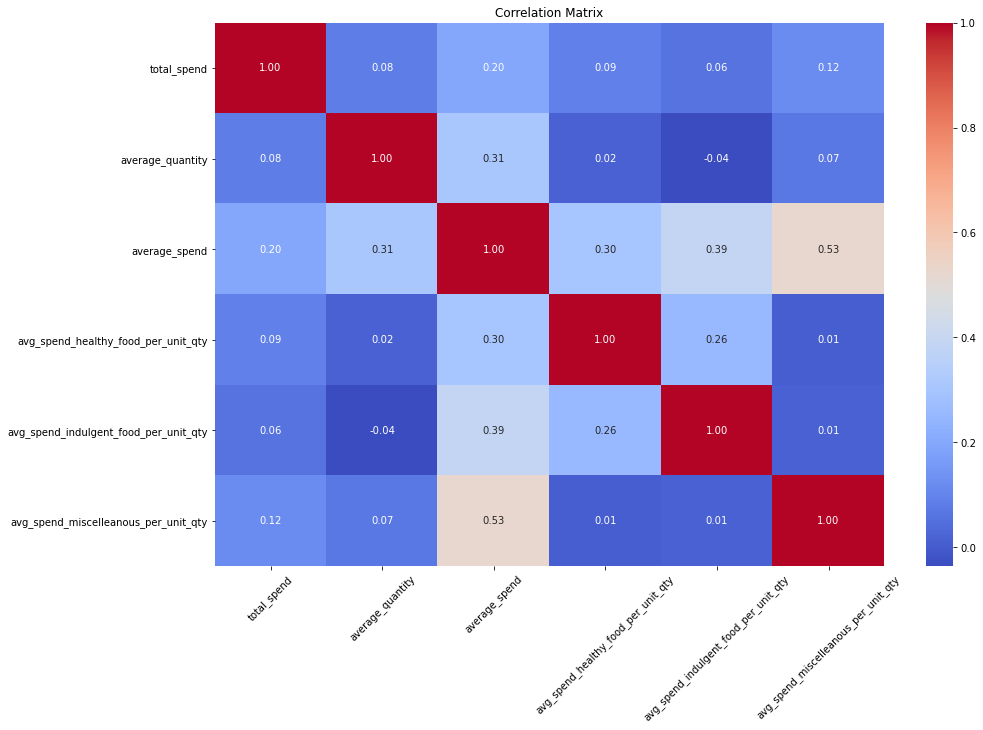

In [482]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming customers_features_merged is your DataFrame
# Select only numeric columns
numeric_df = customers_features_merged.select_dtypes(include=['int', 'float'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, 
            annot_kws={"size": 10})
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.title('Correlation Matrix')
plt.show()


As it can be observed with newly engineered features the above correlation matrix looks better than before and no correlation is above 0.7

In [483]:
customers_features_merged.isnull().sum()

total_spend                               0
total_quantity                            0
average_quantity                          0
average_spend                             0
SUM_basket_categories                     0
avg_spend_healthy_food_per_unit_qty       0
avg_spend_indulgent_food_per_unit_qty     2
avg_spend_miscelleanous_per_unit_qty     89
dtype: int64

In [484]:
customers_features_merged['avg_spend_indulgent_food_per_unit_qty'] = customers_features_merged['avg_spend_indulgent_food_per_unit_qty'].fillna(method='ffill')
customers_features_merged['avg_spend_miscelleanous_per_unit_qty'] = customers_features_merged['avg_spend_miscelleanous_per_unit_qty'].fillna(method='ffill')


In [485]:
customers_features_merged.isnull().sum()

total_spend                              0
total_quantity                           0
average_quantity                         0
average_spend                            0
SUM_basket_categories                    0
avg_spend_healthy_food_per_unit_qty      0
avg_spend_indulgent_food_per_unit_qty    0
avg_spend_miscelleanous_per_unit_qty     0
dtype: int64

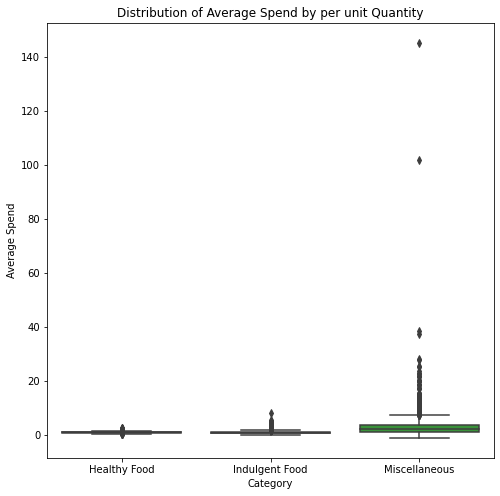

In [486]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.boxplot(data=customers_features_merged[['avg_spend_healthy_food_per_unit_qty', 'avg_spend_indulgent_food_per_unit_qty', 'avg_spend_miscelleanous_per_unit_qty']])
plt.xlabel('Category')
plt.ylabel('Average Spend')
plt.title('Distribution of Average Spend by per unit Quantity')
plt.xticks(ticks=[0, 1, 2], labels=['Healthy Food', 'Indulgent Food', 'Miscellaneous'])
plt.show()

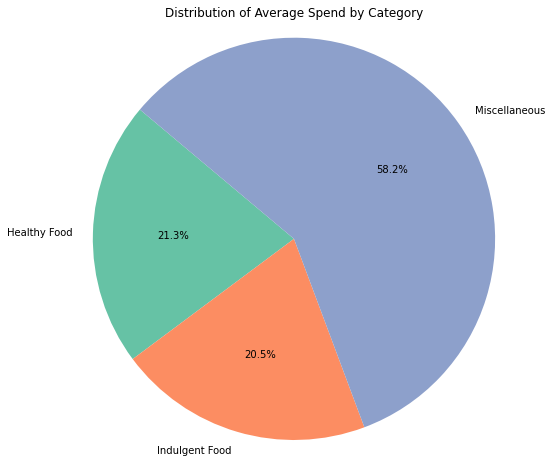

In [487]:
import matplotlib.pyplot as plt

# Data
average_spend_data = customers_features_merged[['avg_spend_healthy_food_per_unit_qty', 'avg_spend_indulgent_food_per_unit_qty', 'avg_spend_miscelleanous_per_unit_qty']]
categories = ['Healthy Food', 'Indulgent Food', 'Miscellaneous']

# Calculate total average spend for each category
total_avg_spend = average_spend_data.sum(axis=0)

# Custom colors for each category
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_avg_spend, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Average Spend by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [488]:
customers_features_merged.columns

Index(['total_spend', 'total_quantity', 'average_quantity', 'average_spend',
       'SUM_basket_categories', 'avg_spend_healthy_food_per_unit_qty',
       'avg_spend_indulgent_food_per_unit_qty',
       'avg_spend_miscelleanous_per_unit_qty'],
      dtype='object')

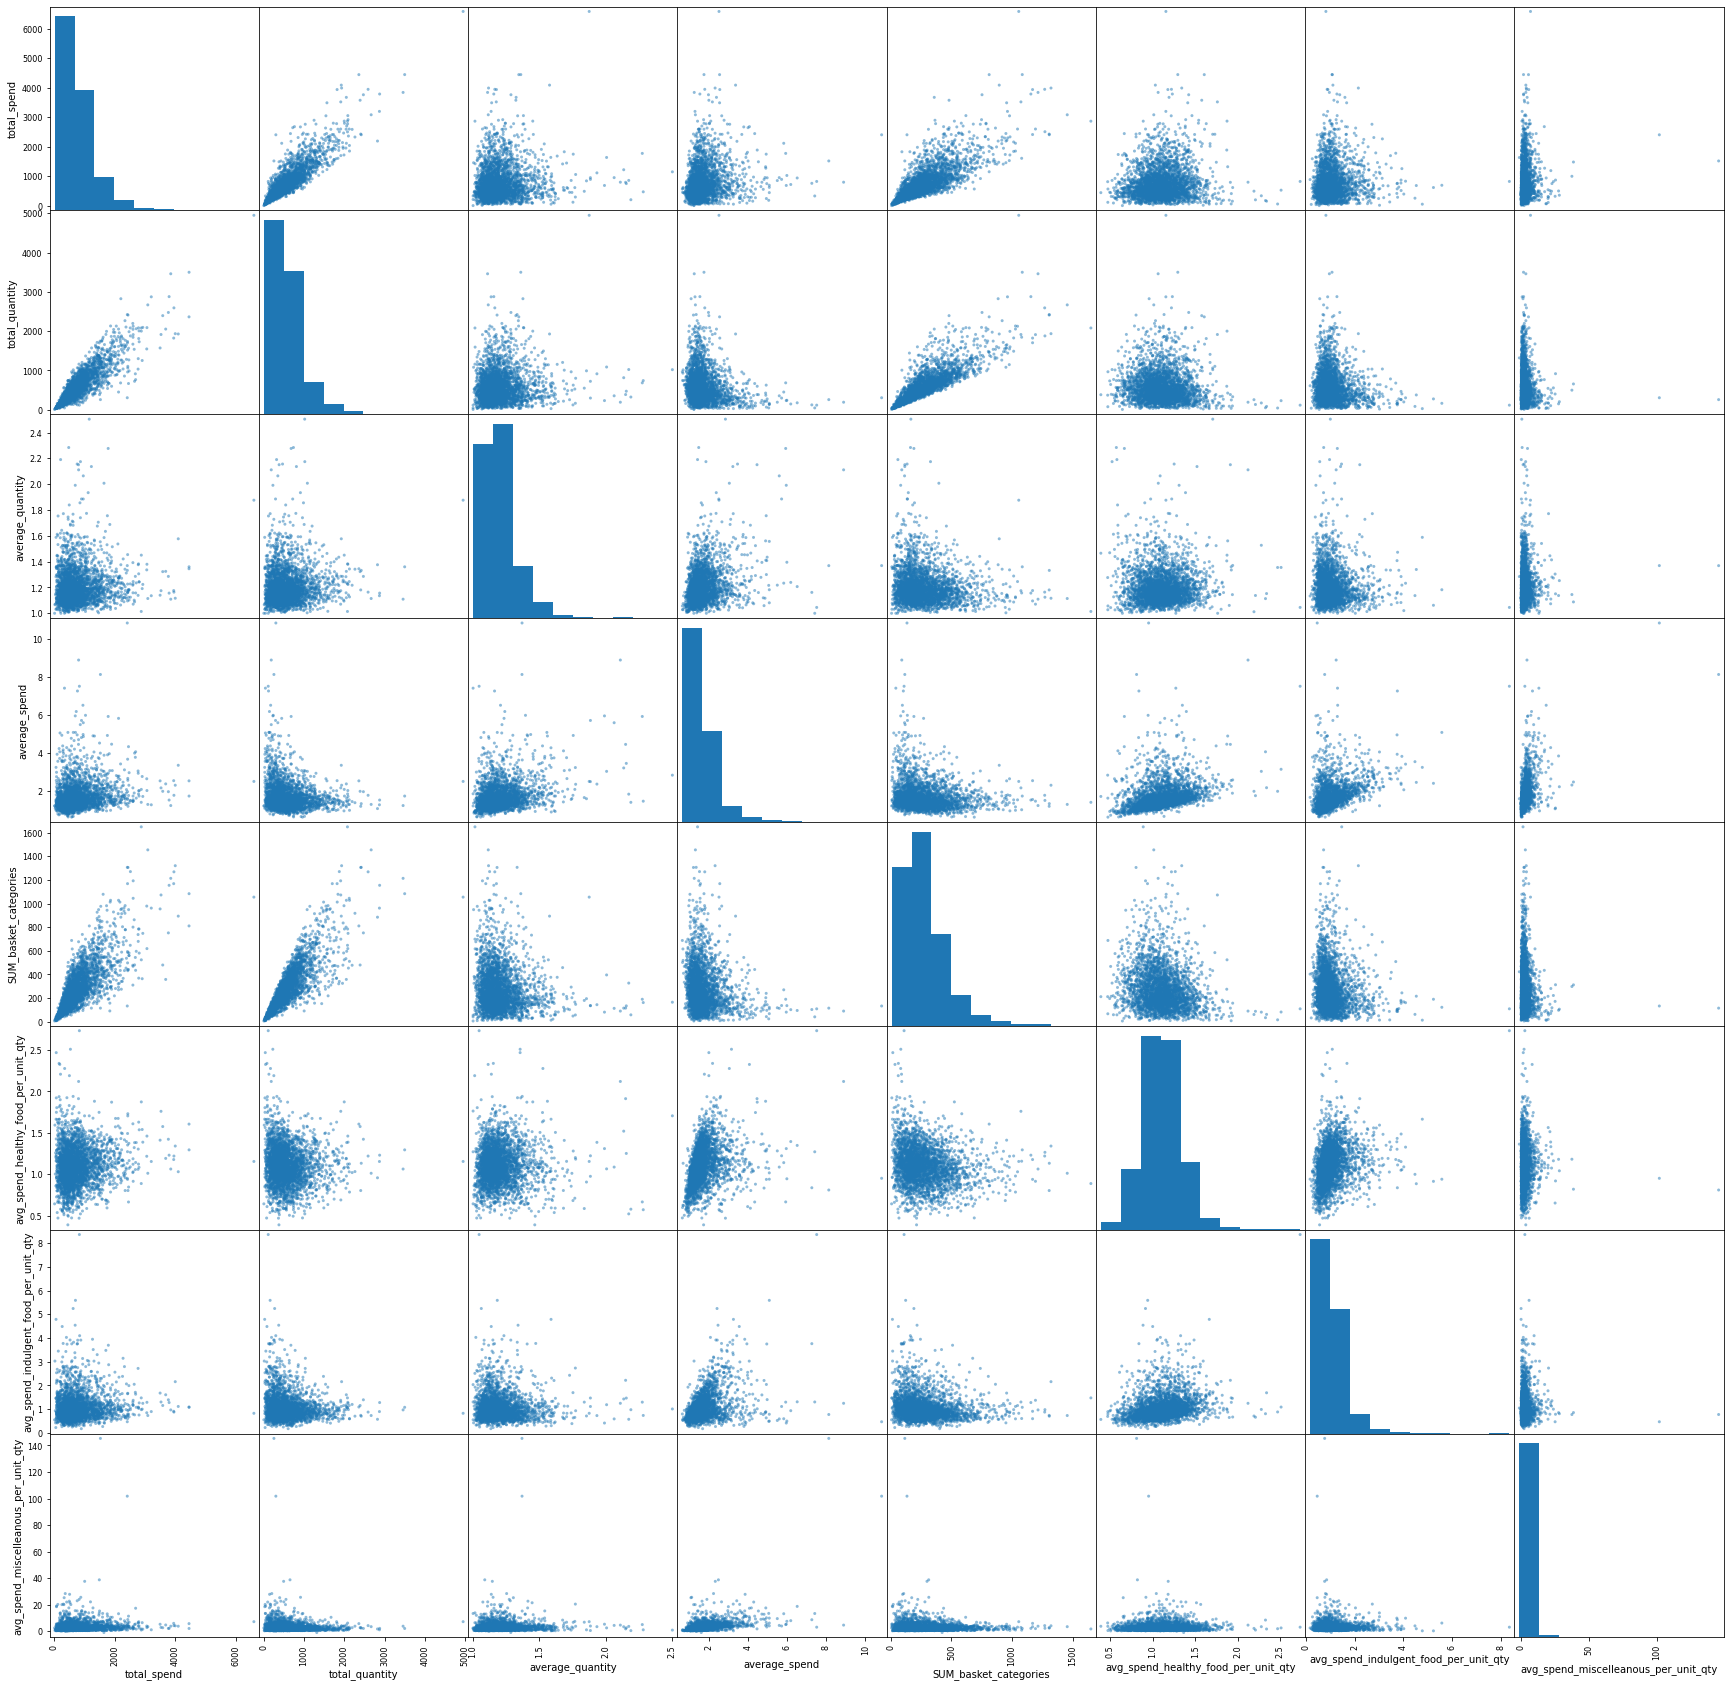

In [489]:
scatter = pd.plotting.scatter_matrix(customers_features_merged, figsize = (30,30))

Applying the log transform to make the data more "normal"

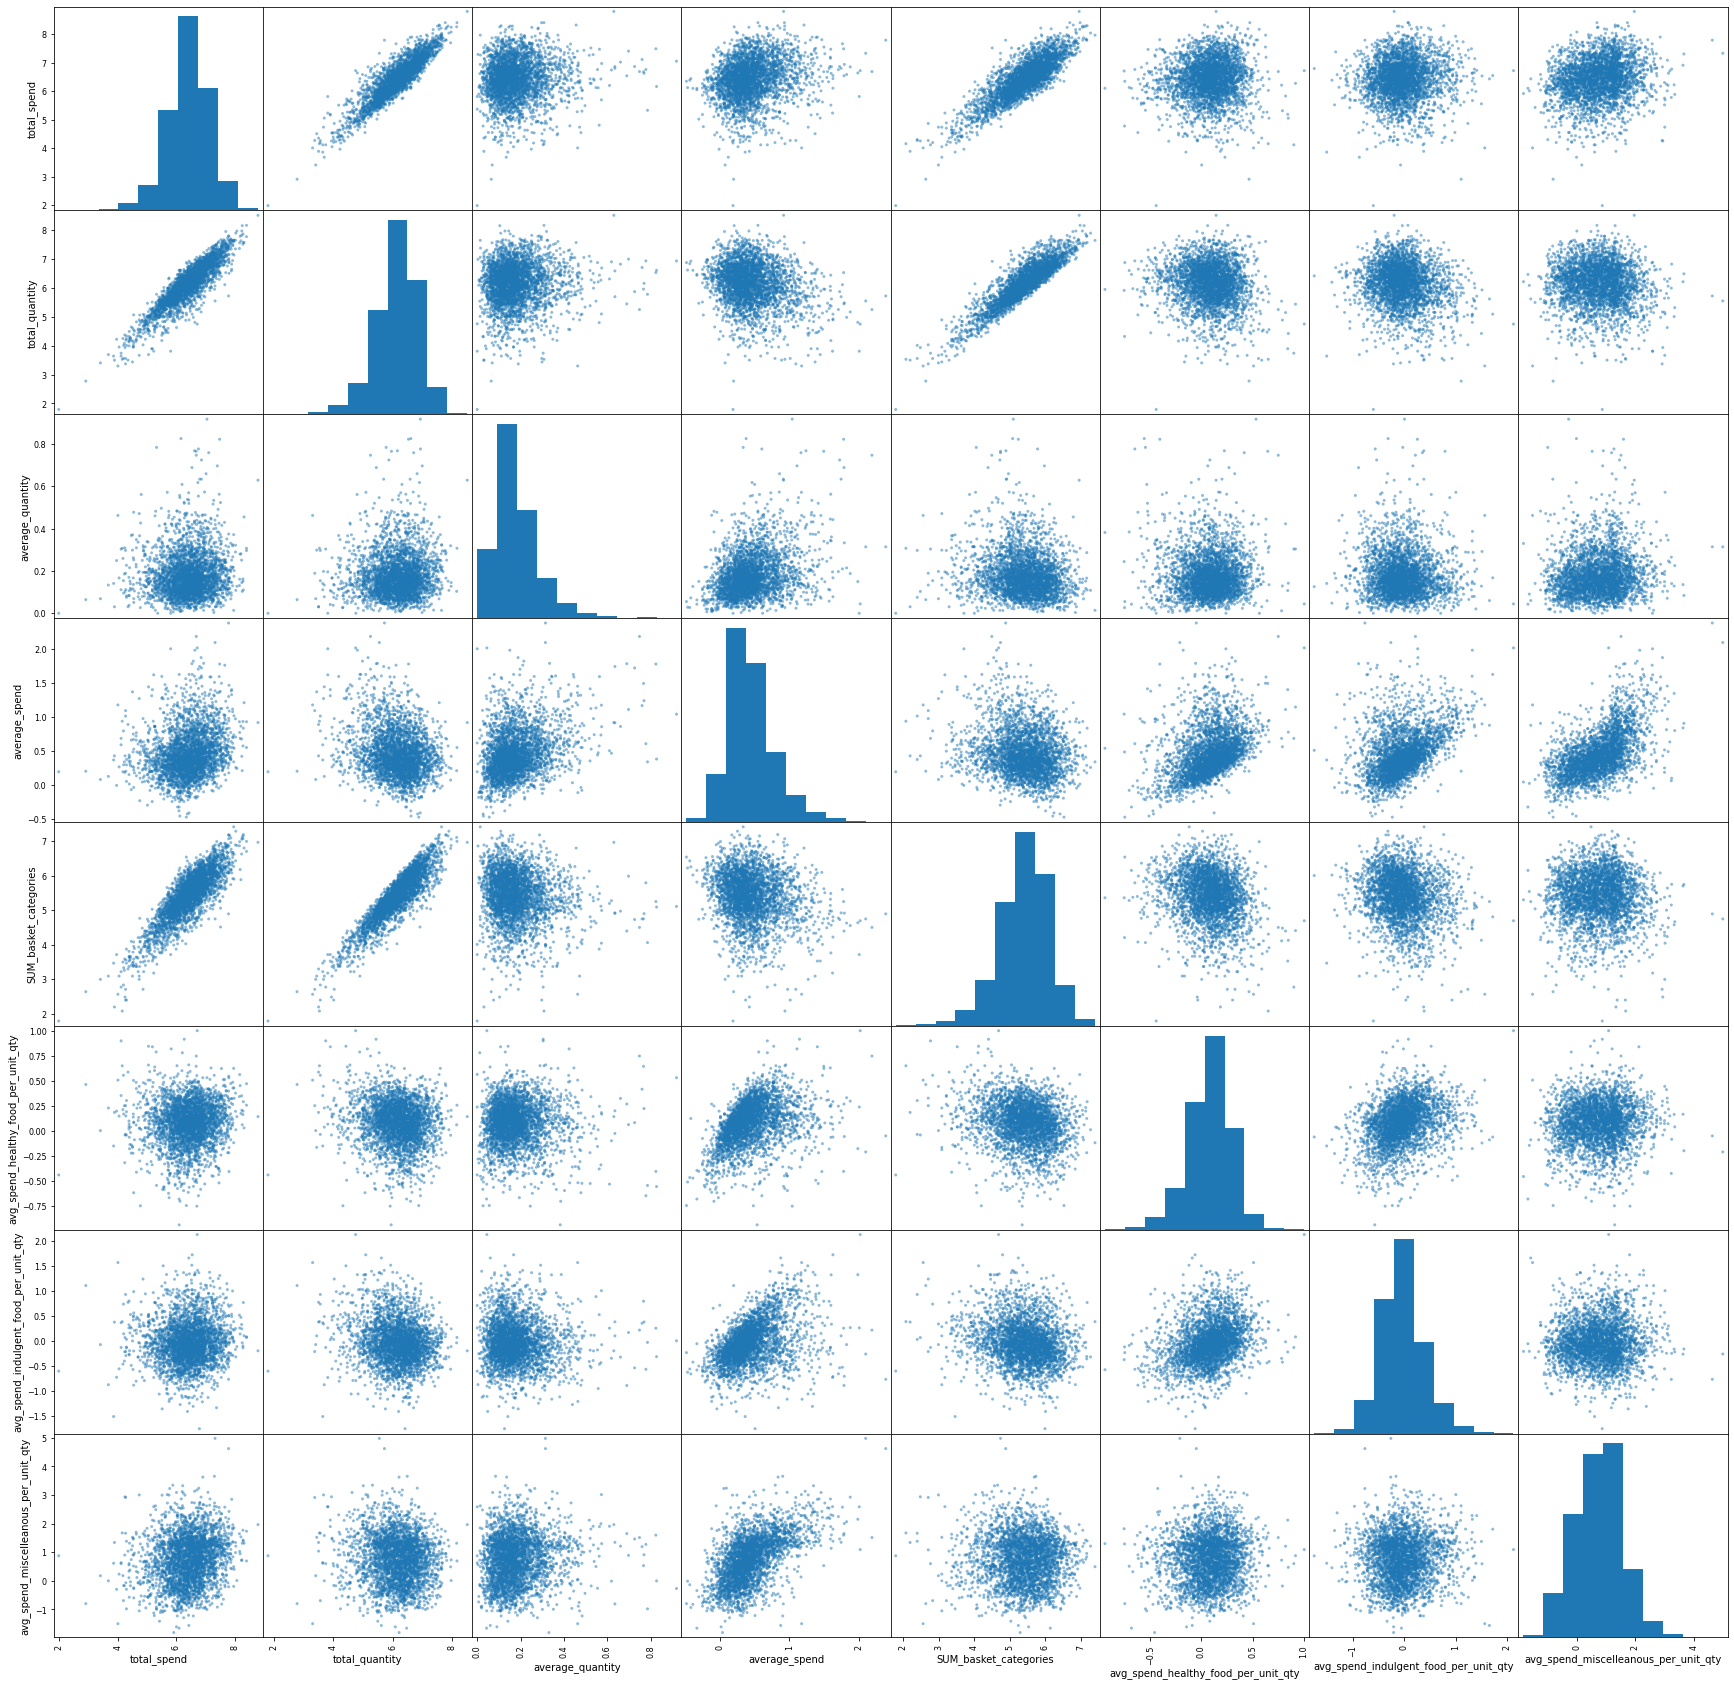

In [490]:
customers_features_merged = customers_features_merged.replace(0, 1)

for col in customers_features_merged.select_dtypes(include=['int64', 'float64']).columns:
    min_value = customers_features_merged[col].min()
    customers_features_merged[col] = np.where(customers_features_merged[col] < 0, 1, customers_features_merged[col])
# Scale the data using the natural logarithm
logged_data = np.log(customers_features_merged)

#-- Produce a scatter matrix using the logged data...
scatter = pd.plotting.scatter_matrix(logged_data, figsize = (30,30))

# Using principal component analysis (PCA)

In [491]:
import sklearn

from sklearn.decomposition import PCA

#-- Apply PCA by fitting the good data 
pca = PCA(n_components=6)
pca.fit(logged_data)

PCA(n_components=6)

             total_spend  total_quantity  average_quantity  average_spend  \
Dimension 1    -0.567856       -0.591002         -0.000249       0.022900   
Dimension 2     0.151071       -0.104193          0.015679       0.270991   
Dimension 3     0.297697       -0.047927          0.013760       0.359428   
Dimension 4     0.356255        0.073029          0.162789       0.445891   
Dimension 5    -0.000423        0.577438          0.092605      -0.485095   
Dimension 6     0.107907        0.067438          0.244526       0.284977   

             SUM_basket_categories  avg_spend_healthy_food_per_unit_qty  \
Dimension 1              -0.570345                             0.017721   
Dimension 2              -0.065938                             0.033733   
Dimension 3              -0.160210                             0.212702   
Dimension 4              -0.432361                             0.337330   
Dimension 5              -0.611629                             0.032822   
Dimension 

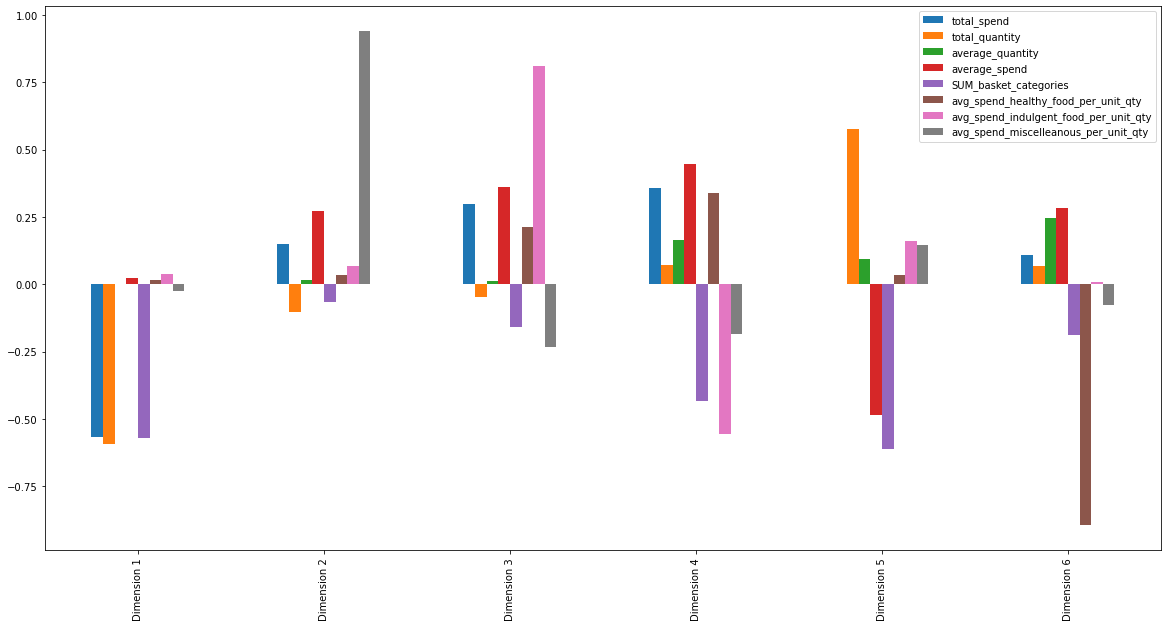

In [492]:
pca_results= pd.DataFrame(data= pca.fit(logged_data).components_, columns= customers_features_merged.columns, index= ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5', 'Dimension 6'])
print(pca_results)

#-- Generate a PCA results bar plot
pca_results.plot.bar(figsize=(20, 10))

#-- Print out the explained variance of each component, as well as cumulatively
explained_variance = pca.explained_variance_ratio_
print('Explained variance of each component:', explained_variance)
print('Cumulative explained variance:', np.cumsum(explained_variance))

84.4% of the variance in the data is explained by the first and second principal components.
96.37% of the variance in the data is explained by the first four principal components.

The first principal component (PC1):Here a decrease in PC1 is associated with large increases in "total spend", "total quantity" and "sum basket categories" features. 
The second principal component (PC2): In this case a decrease in PC2 is associated with large increases in "avg spend Miscelleanous per unit quantity", "average spend" and "total spend.


# Selecting our Final Features

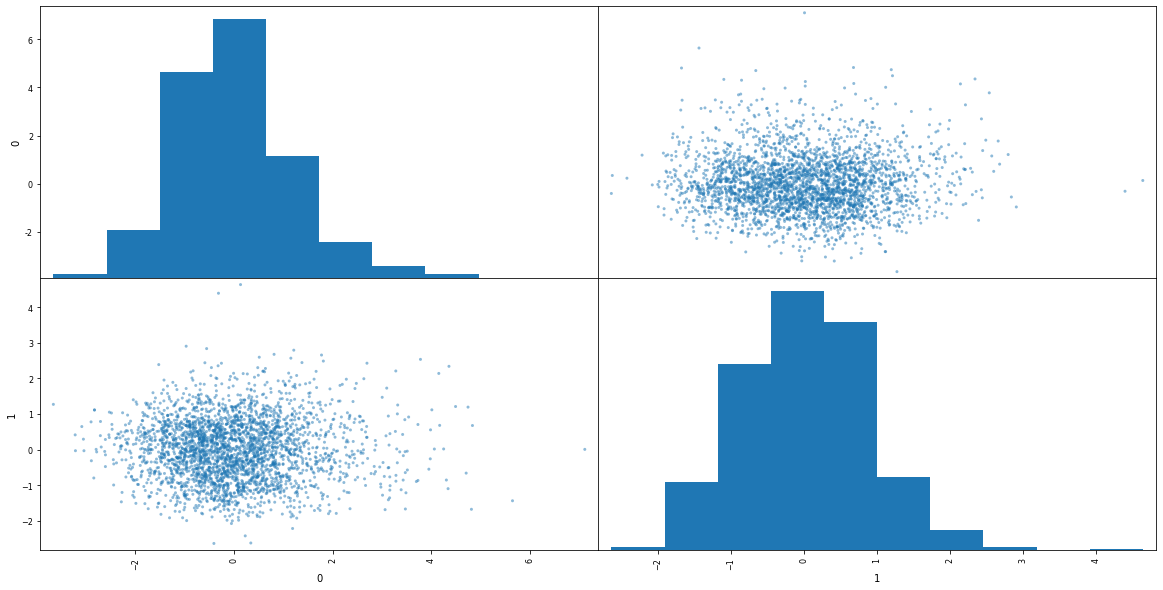

In [493]:
# TO DO: Apply PCA by fitting the good data with only two dimensions
# Instantiate
pca = PCA(n_components=2)
pca.fit(logged_data)

# TO DO: Transform the good data using the PCA fit above
reduced_data = pca.transform(logged_data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data)
scatter = pd.plotting.scatter_matrix(reduced_data, figsize = (20,10))

# Clustering

Finding the right number of segments

In [494]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Create range of clusters
range_n_clusters = list(range(2, 11))
silhouette_scores = []
print(range_n_clusters)

# Loop through clusters
for n_clusters in range_n_clusters:
    # TO DO: Apply your clustering algorithm of choice to the reduced data
    clusterer = KMeans(n_clusters = n_clusters).fit(reduced_data)

    # TO DO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TO DO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TO DO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    silhouette_scores.append(score)
    print("For n_clusters = {}. The average silhouette_score is : {})".format(n_clusters, score))

[2, 3, 4, 5, 6, 7, 8, 9, 10]
For n_clusters = 2. The average silhouette_score is : 0.35795834680801436)
For n_clusters = 3. The average silhouette_score is : 0.3335478000080918)
For n_clusters = 4. The average silhouette_score is : 0.34720231041798705)
For n_clusters = 5. The average silhouette_score is : 0.3183047205688069)
For n_clusters = 6. The average silhouette_score is : 0.320993794571771)
For n_clusters = 7. The average silhouette_score is : 0.3170334040571946)
For n_clusters = 8. The average silhouette_score is : 0.31337742124377693)
For n_clusters = 9. The average silhouette_score is : 0.3271832363909304)
For n_clusters = 10. The average silhouette_score is : 0.3235094398543367)


 n_clusters = 2 gives the best silhouette score folowed by For n_clusters = 4.Lets try to visualise using elbow curve and decide the k best score for the clustering application on our data

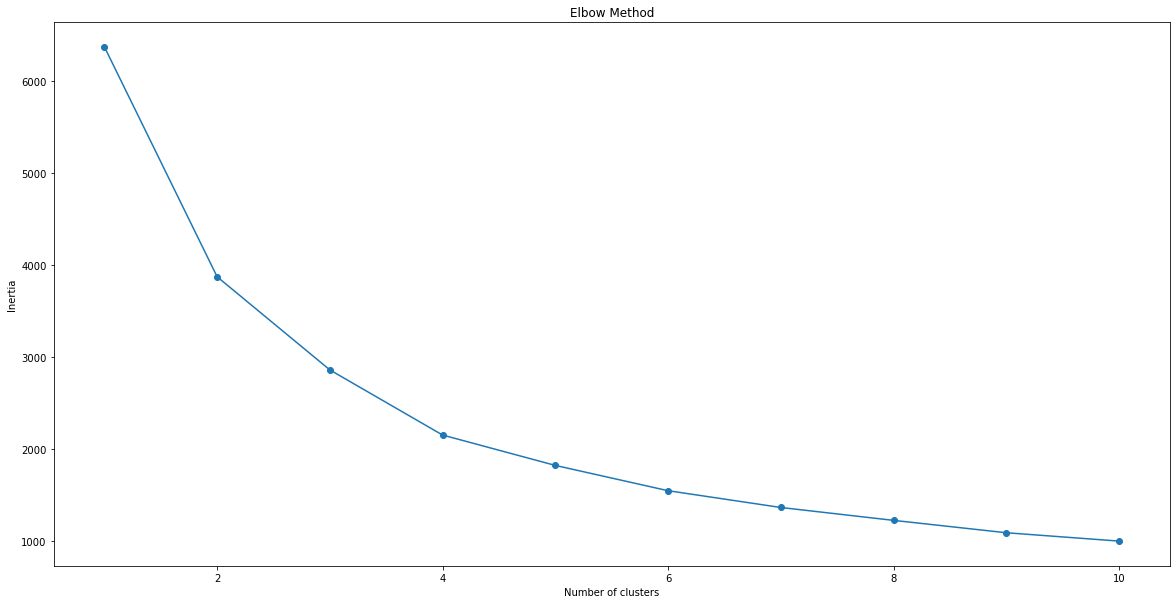

In [495]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# K=2 as the above shows highest score and by elbow method optimal number of segments is k=6

# Cluster Visualisation

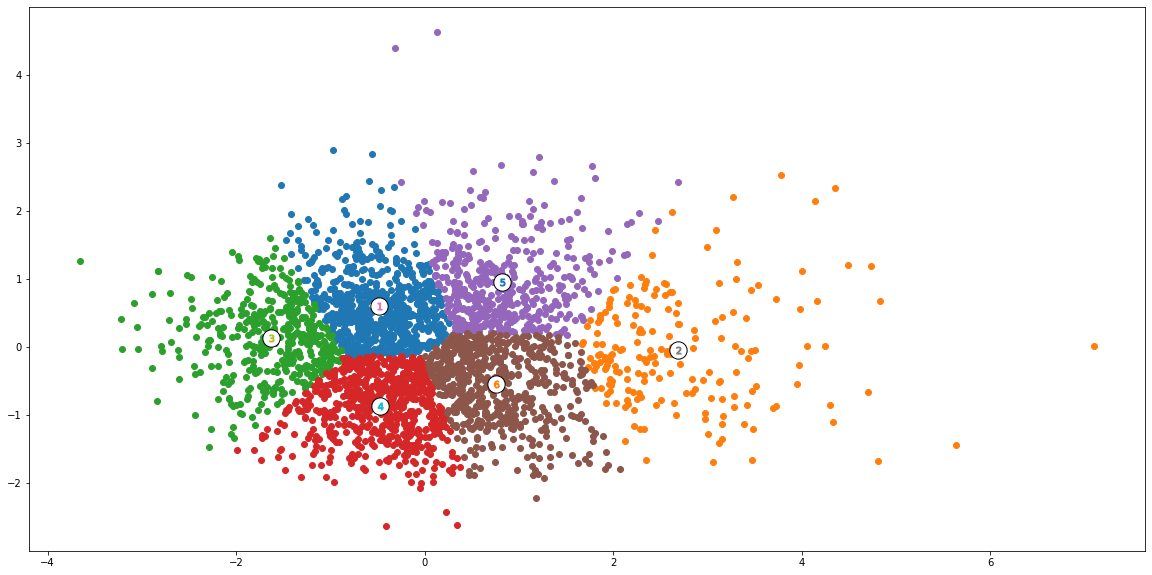

In [496]:
import random

# Set a fixed random seed
random_seed = 42  # You can choose any integer value
np.random.seed(random_seed)
random.seed(random_seed)
#-- Our final clustering solution
clusterer = KMeans(n_clusters=6).fit(reduced_data)
preds = clusterer.predict(reduced_data)
preds += 1
centres = clusterer.cluster_centers_


#-- Put the predictions into a pandas dataframe format
assignments = pd.DataFrame(preds, columns = ['Cluster'])

#-- Put the predictions into a pandas dataframe format
plot_data = pd.concat([assignments, reduced_data], axis = 1)

#-- Color the points based on assigned cluster (n.b scatter will do this for us automatically)
plt.rcParams['figure.figsize'] = (20,10)

for i, c in plot_data.groupby('Cluster'):
    plt.scatter(c[0], c[1])

#-- Plot where the cluster centers are
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i+1), alpha = 1, s=50);

# Recovering Segment Archetypes in the original variables

In [497]:
# TO DO: Inverse transform the centres
log_centres = pca.inverse_transform(centres)

# TO DO: Exponentiate the centres
true_centres = np.exp(log_centres)

#-- Display the true centres
segments = ['Segment {}'.format(i+1) for i in range(0, len(centres))]
true_centres = pandas.DataFrame(np.round(true_centres), columns = customers_features_merged.columns)
true_centres.index = segments
print(true_centres)

           total_spend  total_quantity  average_quantity  average_spend  \
Segment 1        885.0           583.0               1.0            2.0   
Segment 2        132.0            95.0               1.0            2.0   
Segment 3       1573.0          1201.0               1.0            2.0   
Segment 4        703.0           675.0               1.0            1.0   
Segment 5        443.0           259.0               1.0            2.0   
Segment 6        366.0           314.0               1.0            1.0   

           SUM_basket_categories  avg_spend_healthy_food_per_unit_qty  \
Segment 1                  281.0                                  1.0   
Segment 2                   48.0                                  1.0   
Segment 3                  556.0                                  1.0   
Segment 4                  308.0                                  1.0   
Segment 5                  130.0                                  1.0   
Segment 6                  149.0    

# Creating Profiles

In [498]:
customers_features_merged.reset_index(inplace=True)

In [499]:
import random

# Set a fixed random seed
random_seed = 42  # You can choose any integer value
np.random.seed(random_seed)
random.seed(random_seed)
#-- Join the segment assignments to the original data
final_assignments1 = pandas.concat([assignments, customers_features_merged], axis = 1)

#-- Create a loop that describes summary statistics for each segment
for c, d in final_assignments1.groupby('Cluster'):
    print("Segment", c)
    display(d.describe())

for c, d in final_assignments1.groupby('Cluster'):
    print('Seg:', c)
    display(d.describe)

Segment 1


Cluster  customer_number  total_spend  total_quantity  \
count    694.0       694.000000   694.000000      694.000000   
mean       1.0      8379.461095   910.526873      600.355908   
std        0.0      4132.520689   313.150572      156.179029   
min        1.0        14.000000   398.330000      272.000000   
25%        1.0      5016.000000   691.210000      477.000000   
50%        1.0      8237.000000   849.225000      589.500000   
75%        1.0     12050.750000  1048.875000      705.750000   
max        1.0     16294.000000  2683.550000     1157.000000   

       average_quantity  average_spend  SUM_basket_categories  \
count        694.000000     694.000000             694.000000   
mean           1.216481       1.890994             298.714697   
std            0.148595       0.656343              80.433651   
min            1.012346       0.890000              91.000000   
25%            1.125935       1.450000             239.000000   
50%            1.179180       1.710000             291.000000   
75%            1.263874       2.180000             354.750000   
max            2.276667       5.920000             569.000000   

       avg_spend_healthy_food_per_unit_qty  \
count                           694.000000   
mean                              1.112645   
std                               0.217574   
min                               0.470350   
25%                               0.971515   
50%                               1.105571   
75%                               1.257242   
max                               1.881053   

       avg_spend_indulgent_food_per_unit_qty  \
count                             694.000000   
mean                                1.072853   
std                                 0.527702   
min                                 0.174599   
25%                                 0.731156   
50%                                 0.947070   
75%                                 1.252167   
max                                 4.538295   

       avg_spend_miscelleanous_per_unit_qty  
count                            694.000000  
mean                               4.398891  
std                                3.185546  
min                                1.561307  
25%                                2.786787  
50%                                3.555115  
75%                                4.767728  
max                               38.685417

Segment 2


Cluster  customer_number  total_spend  total_quantity  \
count    194.0       194.000000   194.000000      194.000000   
mean       2.0     10050.020619   148.075309      108.551546   
std        0.0      5088.221575    57.718973       44.525476   
min        2.0       149.000000     7.280000        6.000000   
25%        2.0      5364.250000   102.715000       73.250000   
50%        2.0     11948.500000   150.305000      109.000000   
75%        2.0     14399.000000   192.257500      147.500000   
max        2.0     16229.000000   298.310000      212.000000   

       average_quantity  average_spend  SUM_basket_categories  \
count        194.000000     194.000000             194.000000   
mean           1.204187       1.755155              52.067010   
std            0.128335       0.698672              21.642662   
min            1.000000       0.930000               6.000000   
25%            1.117805       1.330000              35.250000   
50%            1.172101       1.545000              51.500000   
75%            1.274148       1.930000              69.000000   
max            1.753623       5.050000             102.000000   

       avg_spend_healthy_food_per_unit_qty  \
count                           194.000000   
mean                              1.198922   
std                               0.319224   
min                               0.472143   
25%                               0.985524   
50%                               1.156608   
75%                               1.355893   
max                               2.467857   

       avg_spend_indulgent_food_per_unit_qty  \
count                             194.000000   
mean                                1.246795   
std                                 0.658204   
min                                 0.222500   
25%                                 0.827705   
50%                                 1.086558   
75%                                 1.474909   
max                                 4.785000   

       avg_spend_miscelleanous_per_unit_qty  
count                            194.000000  
mean                               2.618329  
std                                2.753519  
min                                0.223333  
25%                                1.133077  
50%                                1.849286  
75%                                3.186923  
max                               20.143333

Segment 3


Cluster  customer_number  total_spend  total_quantity  \
count    425.0       425.000000   425.000000      425.000000   
mean       3.0      7535.355294  1705.746024     1278.967059   
std        0.0      3776.185667   673.297701      472.889242   
min        3.0        67.000000   645.010000      698.000000   
25%        3.0      4513.000000  1288.260000      945.000000   
50%        3.0      7747.000000  1537.260000     1164.000000   
75%        3.0     10558.000000  1982.450000     1487.000000   
max        3.0     16043.000000  6588.650000     4949.000000   

       average_quantity  average_spend  SUM_basket_categories  \
count        425.000000     425.000000             425.000000   
mean           1.207997       1.644047             578.790588   
std            0.121983       0.458416             216.805736   
min            1.003717       0.830000             153.000000   
25%            1.124509       1.330000             435.000000   
50%            1.186386       1.560000             530.000000   
75%            1.262229       1.840000             671.000000   
max            2.007394       3.990000            1650.000000   

       avg_spend_healthy_food_per_unit_qty  \
count                           425.000000   
mean                              1.110797   
std                               0.213379   
min                               0.556789   
25%                               0.970170   
50%                               1.098837   
75%                               1.243484   
max                               1.873267   

       avg_spend_indulgent_food_per_unit_qty  \
count                             425.000000   
mean                                1.006543   
std                                 0.412843   
min                                 0.265094   
25%                                 0.721792   
50%                                 0.911339   
75%                                 1.175724   
max                                 3.144109   

       avg_spend_miscelleanous_per_unit_qty  
count                            425.000000  
mean                               2.803286  
std                                1.510374  
min                                0.577491  
25%                                1.750871  
50%                                2.471707  
75%                                3.487338  
max                               10.437600

Segment 4


Cluster  customer_number  total_spend  total_quantity  \
count    649.0       649.000000   649.000000      649.000000   
mean       4.0      6771.004622   745.989307      701.191063   
std        0.0      4738.888485   252.145936      218.929989   
min        4.0        45.000000   315.920000      376.000000   
25%        4.0      2469.000000   570.240000      541.000000   
50%        4.0      6566.000000   695.330000      645.000000   
75%        4.0     10451.000000   871.570000      807.000000   
max        4.0     16281.000000  2020.230000     1798.000000   

       average_quantity  average_spend  SUM_basket_categories  \
count        649.000000     649.000000             649.000000   
mean           1.186274       1.277196             323.818182   
std            0.129843       0.296328             109.908383   
min            1.006849       0.620000             110.000000   
25%            1.109610       1.090000             244.000000   
50%            1.166667       1.250000             301.000000   
75%            1.224096       1.420000             392.000000   
max            2.503686       2.900000             739.000000   

       avg_spend_healthy_food_per_unit_qty  \
count                           649.000000   
mean                              1.049103   
std                               0.210720   
min                               0.473398   
25%                               0.914532   
50%                               1.050874   
75%                               1.170284   
max                               1.705489   

       avg_spend_indulgent_food_per_unit_qty  \
count                             649.000000   
mean                                0.961231   
std                                 0.405015   
min                                 0.246087   
25%                                 0.740088   
50%                                 0.889196   
75%                                 1.081901   
max                                 3.910909   

       avg_spend_miscelleanous_per_unit_qty  
count                            649.000000  
mean                               1.036542  
std                                0.443393  
min                                0.163889  
25%                                0.683333  
50%                                0.962800  
75%                                1.346667  
max                                2.179091

Segment 5


Cluster  customer_number  total_spend  total_quantity  \
count    448.0       448.000000   448.000000      448.000000   
mean       5.0      9448.939732   475.696719      271.316964   
std        0.0      4604.076021   201.258286       85.449476   
min        5.0       111.000000   167.840000       45.000000   
25%        5.0      5628.000000   343.095000      210.750000   
50%        5.0     10304.000000   439.220000      270.500000   
75%        5.0     13286.000000   557.525000      326.500000   
max        5.0     16306.000000  2407.450000      548.000000   

       average_quantity  average_spend  SUM_basket_categories  \
count        448.000000     448.000000             448.000000   
mean           1.228521       2.315290             138.450893   
std            0.151662       1.203508              42.473335   
min            1.000000       0.910000              38.000000   
25%            1.132751       1.587500             106.000000   
50%            1.196699       1.930000             139.000000   
75%            1.286045       2.685000             169.000000   
max            2.150838      10.840000             276.000000   

       avg_spend_healthy_food_per_unit_qty  \
count                           448.000000   
mean                              1.146858   
std                               0.264356   
min                               0.390000   
25%                               0.996381   
50%                               1.129288   
75%                               1.282131   
max                               2.732500   

       avg_spend_indulgent_food_per_unit_qty  \
count                             448.000000   
mean                                1.201974   
std                                 0.758609   
min                                 0.259012   
25%                                 0.765435   
50%                                 0.985463   
75%                                 1.353025   
max                                 8.361667   

       avg_spend_miscelleanous_per_unit_qty  
count                            448.000000  
mean                               6.347338  
std                                8.934438  
min                                1.700000  
25%                                3.441618  
50%                                4.384000  
75%                                6.429183  
max                              145.338889

Segment 6


Cluster  customer_number  total_spend  total_quantity  \
count    590.0       590.000000   590.000000      590.000000   
mean       6.0      7952.694915   382.042881      327.586441   
std        0.0      5220.816856   111.934900       89.229841   
min        6.0        52.000000   115.900000      149.000000   
25%        6.0      2862.750000   298.052500      256.500000   
50%        6.0      7971.000000   372.625000      325.500000   
75%        6.0     12634.000000   455.835000      390.000000   
max        6.0     16316.000000   810.440000      617.000000   

       average_quantity  average_spend  SUM_basket_categories  \
count        590.000000     590.000000             590.000000   
mean           1.189793       1.406288             155.888136   
std            0.123824       0.326416              45.234958   
min            1.011952       0.740000              48.000000   
25%            1.111401       1.200000             123.250000   
50%            1.162390       1.360000             155.000000   
75%            1.232250       1.540000             186.750000   
max            2.190476       3.210000             285.000000   

       avg_spend_healthy_food_per_unit_qty  \
count                           590.000000   
mean                              1.112930   
std                               0.216933   
min                               0.512088   
25%                               0.974537   
50%                               1.106997   
75%                               1.242644   
max                               2.190000   

       avg_spend_indulgent_food_per_unit_qty  \
count                             590.000000   
mean                                1.059339   
std                                 0.509587   
min                                 0.320283   
25%                                 0.752382   
50%                                 0.960930   
75%                                 1.234967   
max                                 5.242353   

       avg_spend_miscelleanous_per_unit_qty  
count                            590.000000  
mean                               1.399250  
std                                0.630414  
min                                0.210000  
25%                                0.868097  
50%                                1.369221  
75%                                1.836938  
max                                3.110000

Seg: 1


<bound method NDFrame.describe of       Cluster  customer_number  total_spend  total_quantity  average_quantity  \
0           1               14       675.72             531          1.393701   
19          1              133       700.34             441          1.242254   
45          1              236       650.07             492          1.239295   
66          1              341       675.36             651          1.230624   
76          1              368       736.22             604          1.102190   
...       ...              ...          ...             ...               ...   
2981        1            16195       688.68             639          1.224138   
2983        1            16203      2448.11             666          1.176678   
2992        1            16287       765.72             583          1.325000   
2993        1            16292      1384.62             793          1.149275   
2994        1            16294       849.26             427          1.4139

Seg: 2


<bound method NDFrame.describe of       Cluster  customer_number  total_spend  total_quantity  average_quantity  \
23          2              149       164.66             150          1.304348   
29          2              176       202.67             141          1.101562   
42          2              230       148.25             115          1.173469   
53          2              275       162.03             151          1.279661   
59          2              305       233.44             108          1.421053   
...       ...              ...          ...             ...               ...   
2953        2            16031       150.63             115          1.292135   
2962        2            16076       142.86             133          1.166667   
2966        2            16100       157.47              91          1.229730   
2979        2            16184       121.59              73          1.123077   
2987        2            16229       211.82             189          1.2945

Seg: 3


<bound method NDFrame.describe of       Cluster  customer_number  total_spend  total_quantity  average_quantity  \
5           3               67      1584.18            1055          1.307311   
26          3              157      1857.65            1208          1.118519   
37          3              206      1075.19            1043          1.147415   
44          3              232      1045.33             992          1.333333   
46          3              244      1338.67            1045          1.366013   
...       ...              ...          ...             ...               ...   
2856        3            15426      1625.86            1058          1.034213   
2901        3            15717      1686.40            1154          1.634561   
2916        3            15813       993.88             717          1.079819   
2935        3            15934      2649.05             723          1.088855   
2958        3            16043      1320.55             972          1.0860

Seg: 4


<bound method NDFrame.describe of       Cluster  customer_number  total_spend  total_quantity  average_quantity  \
1           4               45       585.73             655          1.167558   
3           4               61       547.87             499          1.188095   
7           4               71      1233.78             970          1.199011   
9           4               81       729.04             525          1.286765   
16          4              119       855.23             813          1.245023   
...       ...              ...          ...             ...               ...   
2947        4            15980       607.10             491          1.128736   
2969        4            16117      1359.55            1642          1.112466   
2972        4            16144       564.43             480          1.194030   
2980        4            16193       574.98             672          1.457701   
2991        4            16281       668.36             685          1.1247

Seg: 5


<bound method NDFrame.describe of       Cluster  customer_number  total_spend  total_quantity  average_quantity  \
14          5              111       530.64             387          1.228571   
50          5              258       380.57             240          1.085973   
56          5              280       344.85             215          1.069652   
60          5              308       533.12             356          1.202703   
61          5              309       377.71             330          1.107383   
...       ...              ...          ...             ...               ...   
2977        5            16172       955.15             353          2.064327   
2986        5            16227       460.38             288          1.309091   
2989        5            16234       224.19             266          1.231481   
2995        5            16295       679.70             322          1.162455   
2998        5            16306       462.81             300          1.0989

Seg: 6


<bound method NDFrame.describe of       Cluster  customer_number  total_spend  total_quantity  average_quantity  \
2           6               52       222.18             294          1.427184   
4           6               63       293.34             281          1.048507   
6           6               68       225.41             219          1.073529   
8           6               77       355.16             244          1.070175   
10          6               83       518.58             434          1.104326   
...       ...              ...          ...             ...               ...   
2988        6            16231       195.95             183          1.158228   
2990        6            16254       460.14             372          1.203883   
2996        6            16301       251.43             268          1.207207   
2997        6            16303       354.32             331          1.096026   
2999        6            16316       330.40             213          1.2383

In [500]:
for c, d in final_assignments1.groupby('Cluster'):
    segment_filename = f"segment_{c}.csv"  # Define the filename for each segment
    d.to_csv(segment_filename, index=False)  # Save the segment DataFrame to a CSV file
    print(f"Segment {c} saved to {segment_filename}")

Segment 1 saved to segment_1.csv
Segment 2 saved to segment_2.csv
Segment 3 saved to segment_3.csv
Segment 4 saved to segment_4.csv
Segment 5 saved to segment_5.csv
Segment 6 saved to segment_6.csv


In [509]:
import pandas as pd

# List of segment CSV files
segment_files = ['segment_1.csv', 'segment_2.csv', 'segment_3.csv', 'segment_4.csv', 'segment_5.csv', 'segment_6.csv']

# Read each segment CSV file into a DataFrame and store them in a list
segment_dfs = []
for file in segment_files:
    segment_df = pd.read_csv(file)
    segment_dfs.append(segment_df)

# Concatenate all segment DataFrames vertically
customer_segments = pd.concat(segment_dfs, ignore_index=True)

# Write the combined DataFrame to a new CSV file
customer_segments.to_csv('customer_segments_combined_1.csv', index=False)

# Cluster Evaluation

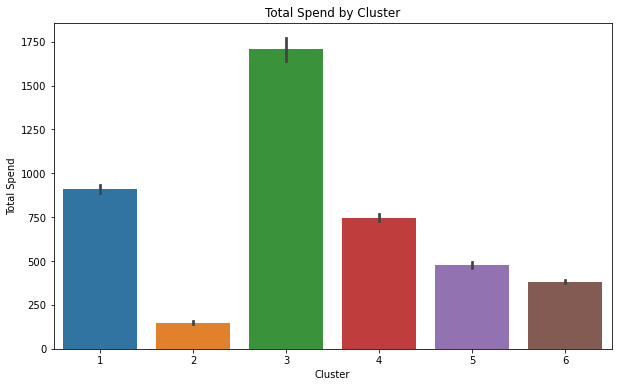

In [502]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot total spend
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='total_spend', data=final_assignments1)
plt.xlabel('Cluster')
plt.ylabel('Total Spend')
plt.title('Total Spend by Cluster')
plt.show()



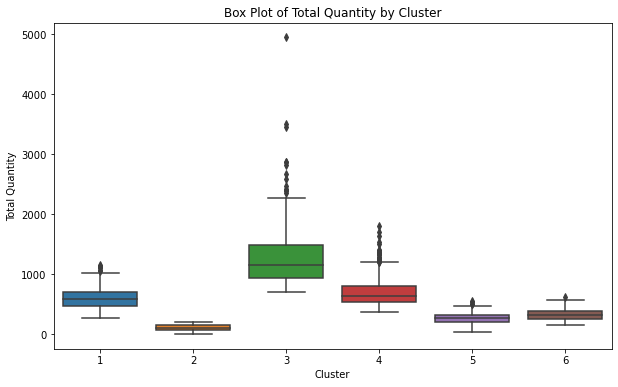

In [503]:
# Box Plot for Total Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='total_quantity', data=final_assignments1)
plt.xlabel('Cluster')
plt.ylabel('Total Quantity')
plt.title('Box Plot of Total Quantity by Cluster')
plt.show()

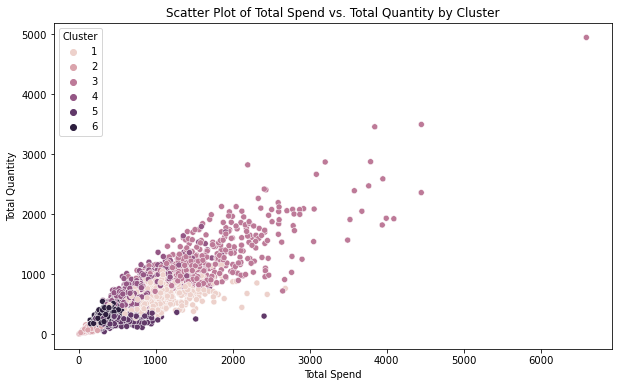

In [504]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_spend', y='total_quantity', hue='Cluster', data=final_assignments1)
plt.xlabel('Total Spend')
plt.ylabel('Total Quantity')
plt.title('Scatter Plot of Total Spend vs. Total Quantity by Cluster')
plt.show()


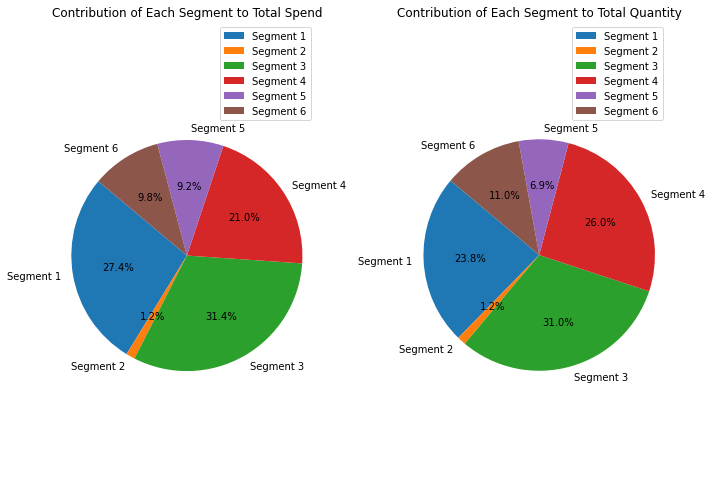

In [507]:
# Calculate total spend for each segment
total_spend_by_segment = final_assignments1.groupby('Cluster')['total_spend'].sum()

# Calculate total quantity for each segment
total_quantity_by_segment = final_assignments1.groupby('Cluster')['total_quantity'].sum()

# Adjust segment labels to start from 1
segments = [f"Segment {i+1}" for i in range(len(total_spend_by_segment))]

# Plot a pie chart for total spend
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.pie(total_spend_by_segment, labels=segments, autopct='%1.1f%%', startangle=140)
plt.title('Contribution of Each Segment to Total Spend')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(segments, loc="best")

# Plot a pie chart for total quantity
plt.subplot(1, 2, 2)
plt.pie(total_quantity_by_segment, labels=segments, autopct='%1.1f%%', startangle=140)
plt.title('Contribution of Each Segment to Total Quantity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(segments, loc="best")

plt.tight_layout()
plt.show()
